# Exploratory analysis of Argentina's ADRs

[American Depositary Reciepts](https://www.investopedia.com/terms/a/adr.asp) (ADRs) are financial instruments that allow US investors to purchase stocks in foreign companies. Argentina has a number of companies listed in US exchanges through ADRs.  
In this notebook, we will explore the performance of these ADRs with a focus on the recent months.

In [1]:
%config InlineBackend.figure_format = 'retina'

import os

import numpy as np
import pandas as pd
import warnings
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')
register_matplotlib_converters()

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

## Data munging

In [3]:
data_dir = 'data/'

In [31]:
tickers = [
    'BMA', 'BFR', 'CEPU', 'CRESY', 'EDN', 'GGAL', 'SUPV', 'IRS',
    'IRCP', 'LOMA', 'NTL', 'MELI', 'PAM', 'PZE', 'TEO', 'TS', 'TX',
    'TGS', 'YPF'
]

dfs = [pd.read_csv(os.path.join(data_dir, ticker.lower() + '.csv')) for ticker in tickers]

adrs_df = pd.concat(dfs, axis=0, ignore_index=False)
adrs_df.to_csv(os.path.join(data_dir, 'adrs.csv'), index=False)

Next we'll concatenate all options daily files into a csv.

In [168]:
dfs = []

for root, dirs, files in os.walk(data_dir):
    if root.endswith('daily'):
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            dfs.append(df)
            
adr_options = pd.concat(dfs, axis=0)
adr_options.to_csv(os.path.join(data_dir, 'adr_options.csv'), index=False)

## Exploration

We begin our exploration of the end-of-day (EOD) data for Argentina's [ADRs](https://www.investopedia.com/terms/a/adr.asp).

In [4]:
adrs_df = pd.read_csv(os.path.join(data_dir, 'adrs.csv'), index_col='date', parse_dates=['date'])
adrs_df.head()

symbol  close   high    low   open   volume  \
date                                                                    
2006-03-27 00:00:00+00:00    BMA  23.05  23.05  22.23  22.89  1065200   
2006-03-28 00:00:00+00:00    BMA  22.38  22.47  21.90  22.47  1556100   
2006-03-29 00:00:00+00:00    BMA  22.84  23.14  22.05  22.10   641300   
2006-03-30 00:00:00+00:00    BMA  22.75  23.10  22.70  23.00   293600   
2006-03-31 00:00:00+00:00    BMA  22.93  22.93  22.35  22.83   113600   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2006-03-27 00:00:00+00:00  15.524521  15.524521  14.972239  15.416759   
2006-03-28 00:00:00+00:00  15.073266  15.133883  14.749979  15.133883   
2006-03-29 00:00:00+00:00  15.383083  15.585138  14.851006  14.884682   
2006-03-30 00:00:00+00:00  15.322467  15.558197  15.288791  15.490846   
2006-03-31 00:00:00+00:00  15.443700  15.443700  15.053061  15.376348   

                           adjVolume  divCash  splitFactor  
date                                                        
2006-03-27 00:00:00+00:00    1065200      0.0          1.0  
2006-03-28 00:00:00+00:00    1556100      0.0          1.0  
2006-03-29 00:00:00+00:00     641300      0.0          1.0  
2006-03-30 00:00:00+00:00     293600      0.0          1.0  
2006-03-31 00:00:00+00:00     113600      0.0          1.0

We'll begin plotting the close prices for each symbol.

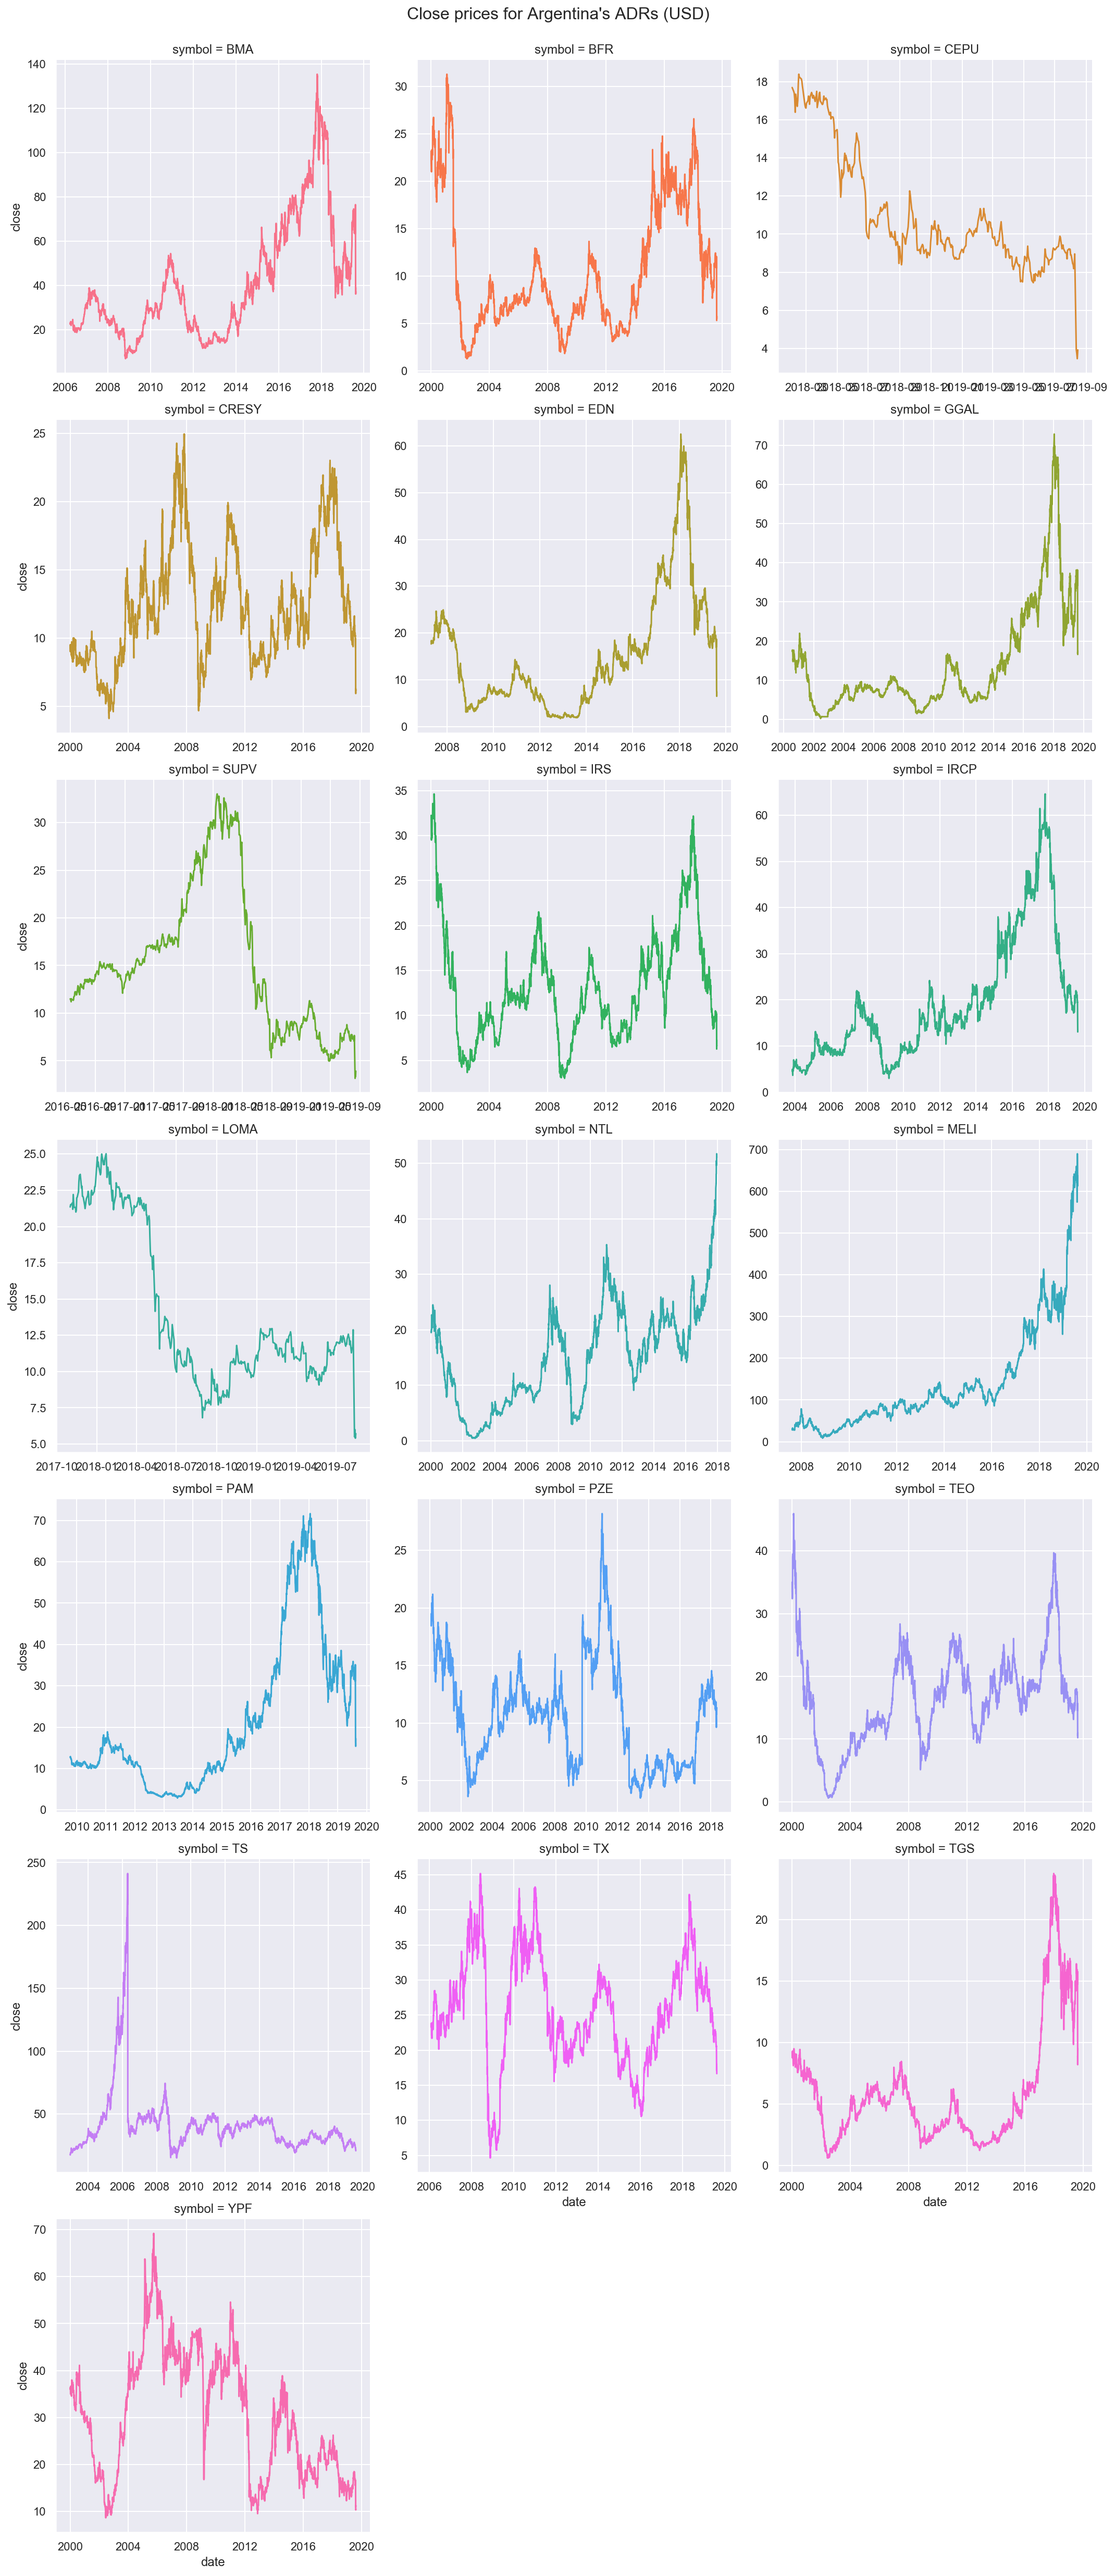

In [8]:
g = sns.relplot(x='date', y='close', col='symbol', hue='symbol',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=False,
            kind='line', data=adrs_df.reset_index())

g.fig.suptitle("Close prices for Argentina's ADRs (USD)", size=16)
g.fig.subplots_adjust(top=.96);

In [9]:
adrs_df.groupby('symbol')['close'].describe()

count        mean         std     min     25%      50%       75%  \
symbol                                                                      
BFR     4936.0   10.605124    6.640204   1.290   5.840   8.0450   14.7575   
BMA     3371.0   40.657659   26.123050   6.830  20.930  32.2000   52.7700   
CEPU     386.0   11.061062    3.035634   3.460   9.060   9.9750   12.2775   
CRESY   4936.0   12.419762    4.296442   4.100   9.020  11.7055   15.0000   
EDN     3099.0   15.310731   12.471194   1.710   6.330  12.1100   20.2450   
GGAL    4795.0   13.896774   13.419612   0.220   5.580   8.2500   17.0150   
IRCP    3971.0   19.571763   13.359246   2.985   9.350  15.9999   22.9700   
IRS     4936.0   13.227096    6.103691   3.010   8.900  12.2850   16.4025   
LOMA     449.0   14.069621    5.356757   5.400  10.340  11.7400   21.1200   
MELI    3025.0  139.253197  126.418214   8.280  61.000  95.2900  154.2400   
NTL     4519.0   15.169815    8.933524   0.480   8.000  15.3300   21.8050   
PAM     2479.0   21.496897   18.049862   2.850   9.895  14.6500   30.8000   
PZE     4608.0   10.600492    4.526129   3.470   6.510  10.6100   13.3000   
SUPV     816.0   15.479773    7.502485   3.160   9.045  14.2550   18.1525   
TEO     4936.0   16.551830    7.548940   0.600  11.590  16.7750   20.9500   
TGS     4936.0    5.915268    4.605565   0.620   2.900   4.8300    6.7725   
TS      4195.0   41.533309   24.503117  15.100  28.645  36.8800   45.0650   
TX      3408.0   25.772642    7.669036   4.650  20.595  25.5800   31.0025   
YPF     4936.0   30.819024   13.111293   8.680  18.420  30.3550   41.0625   

           max  
symbol          
BFR      31.30  
BMA     135.46  
CEPU     18.40  
CRESY    24.95  
EDN      62.55  
GGAL     72.88  
IRCP     64.65  
IRS      34.63  
LOMA     25.02  
MELI    690.10  
NTL      51.70  
PAM      71.65  
PZE      28.20  
SUPV     33.01  
TEO      45.94  
TGS      23.74  
TS      241.31  
TX       45.18  
YPF      69.20

### Daily returns

Next we'll calculate the daily returns.  

$$R_n = \frac{S_n - S_{n-1}}{S_{n-1}}$$

In [10]:
adrs_df['return'] = adrs_df.groupby('symbol')['close'].pct_change() * 100

In [11]:
adrs_df.head()

symbol  close   high    low   open   volume  \
date                                                                    
2006-03-27 00:00:00+00:00    BMA  23.05  23.05  22.23  22.89  1065200   
2006-03-28 00:00:00+00:00    BMA  22.38  22.47  21.90  22.47  1556100   
2006-03-29 00:00:00+00:00    BMA  22.84  23.14  22.05  22.10   641300   
2006-03-30 00:00:00+00:00    BMA  22.75  23.10  22.70  23.00   293600   
2006-03-31 00:00:00+00:00    BMA  22.93  22.93  22.35  22.83   113600   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2006-03-27 00:00:00+00:00  15.524521  15.524521  14.972239  15.416759   
2006-03-28 00:00:00+00:00  15.073266  15.133883  14.749979  15.133883   
2006-03-29 00:00:00+00:00  15.383083  15.585138  14.851006  14.884682   
2006-03-30 00:00:00+00:00  15.322467  15.558197  15.288791  15.490846   
2006-03-31 00:00:00+00:00  15.443700  15.443700  15.053061  15.376348   

                           adjVolume  divCash  splitFactor    return  
date                                                                  
2006-03-27 00:00:00+00:00    1065200      0.0          1.0       NaN  
2006-03-28 00:00:00+00:00    1556100      0.0          1.0 -2.906725  
2006-03-29 00:00:00+00:00     641300      0.0          1.0  2.055407  
2006-03-30 00:00:00+00:00     293600      0.0          1.0 -0.394046  
2006-03-31 00:00:00+00:00     113600      0.0          1.0  0.791209

In [12]:
adrs_df.groupby('symbol')['return'].describe()

count      mean       std        min       25%       50%       75%  \
symbol                                                                        
BFR     4935.0  0.041134  3.674591 -55.850622 -1.748786  0.000000  1.680880   
BMA     3370.0  0.071743  3.285291 -52.667364 -1.513835  0.000000  1.638795   
CEPU     385.0 -0.271721  4.314501 -55.915179 -1.913876 -0.317460  1.581028   
CRESY   4935.0  0.030291  2.765595 -38.090452 -1.257072  0.000000  1.179014   
EDN     3098.0  0.051126  3.888776 -58.983957 -1.690714 -0.031217  1.629187   
GGAL    4794.0  0.093428  4.626758 -56.117370 -1.626710  0.000000  1.693722   
IRCP    3970.0  0.116098  4.223714 -32.424983 -0.712043  0.000000  0.816572   
IRS     4935.0  0.006140  2.678878 -38.287402 -1.255066  0.000000  1.205858   
LOMA     448.0 -0.166143  4.533969 -57.298137 -1.875441 -0.087351  1.505056   
MELI    3024.0  0.163973  3.566248 -21.198668 -1.402990  0.083551  1.589953   
NTL     4518.0  0.077537  3.341541 -46.188341 -1.319439  0.000000  1.360478   
PAM     2478.0  0.059477  2.963741 -53.815490 -1.415248  0.000000  1.406139   
PZE     4607.0  0.050746  3.982526 -51.709402 -1.463638  0.000000  1.411740   
SUPV     815.0 -0.028327  4.184650 -58.746736 -1.407739  0.000000  1.494714   
TEO     4935.0  0.024777  3.081061 -33.375796 -1.428387  0.000000  1.437726   
TGS     4935.0  0.060252  3.415765 -48.035488 -1.513161  0.000000  1.612903   
TS      4194.0  0.056448  2.830229 -80.981971 -1.192419  0.106749  1.351260   
TX      3407.0  0.035517  3.030797 -19.678519 -1.365052  0.000000  1.396084   
YPF     4935.0  0.008630  2.577581 -34.052758 -1.133556  0.000000  1.111950   

               max  
symbol              
BFR      46.760563  
BMA      27.008149  
CEPU     16.880093  
CRESY    27.118644  
EDN      27.551020  
GGAL    153.623188  
IRCP     36.986301  
IRS      18.083573  
LOMA     22.650602  
MELI     36.000000  
NTL      30.000000  
PAM      16.941990  
PZE     179.843750  
SUPV     28.330206  
TEO      23.076923  
TGS      25.203252  
TS       21.576763  
TX       49.096099  
YPF      37.254597

Let's plot a histogram of the daily returns for each symbol.

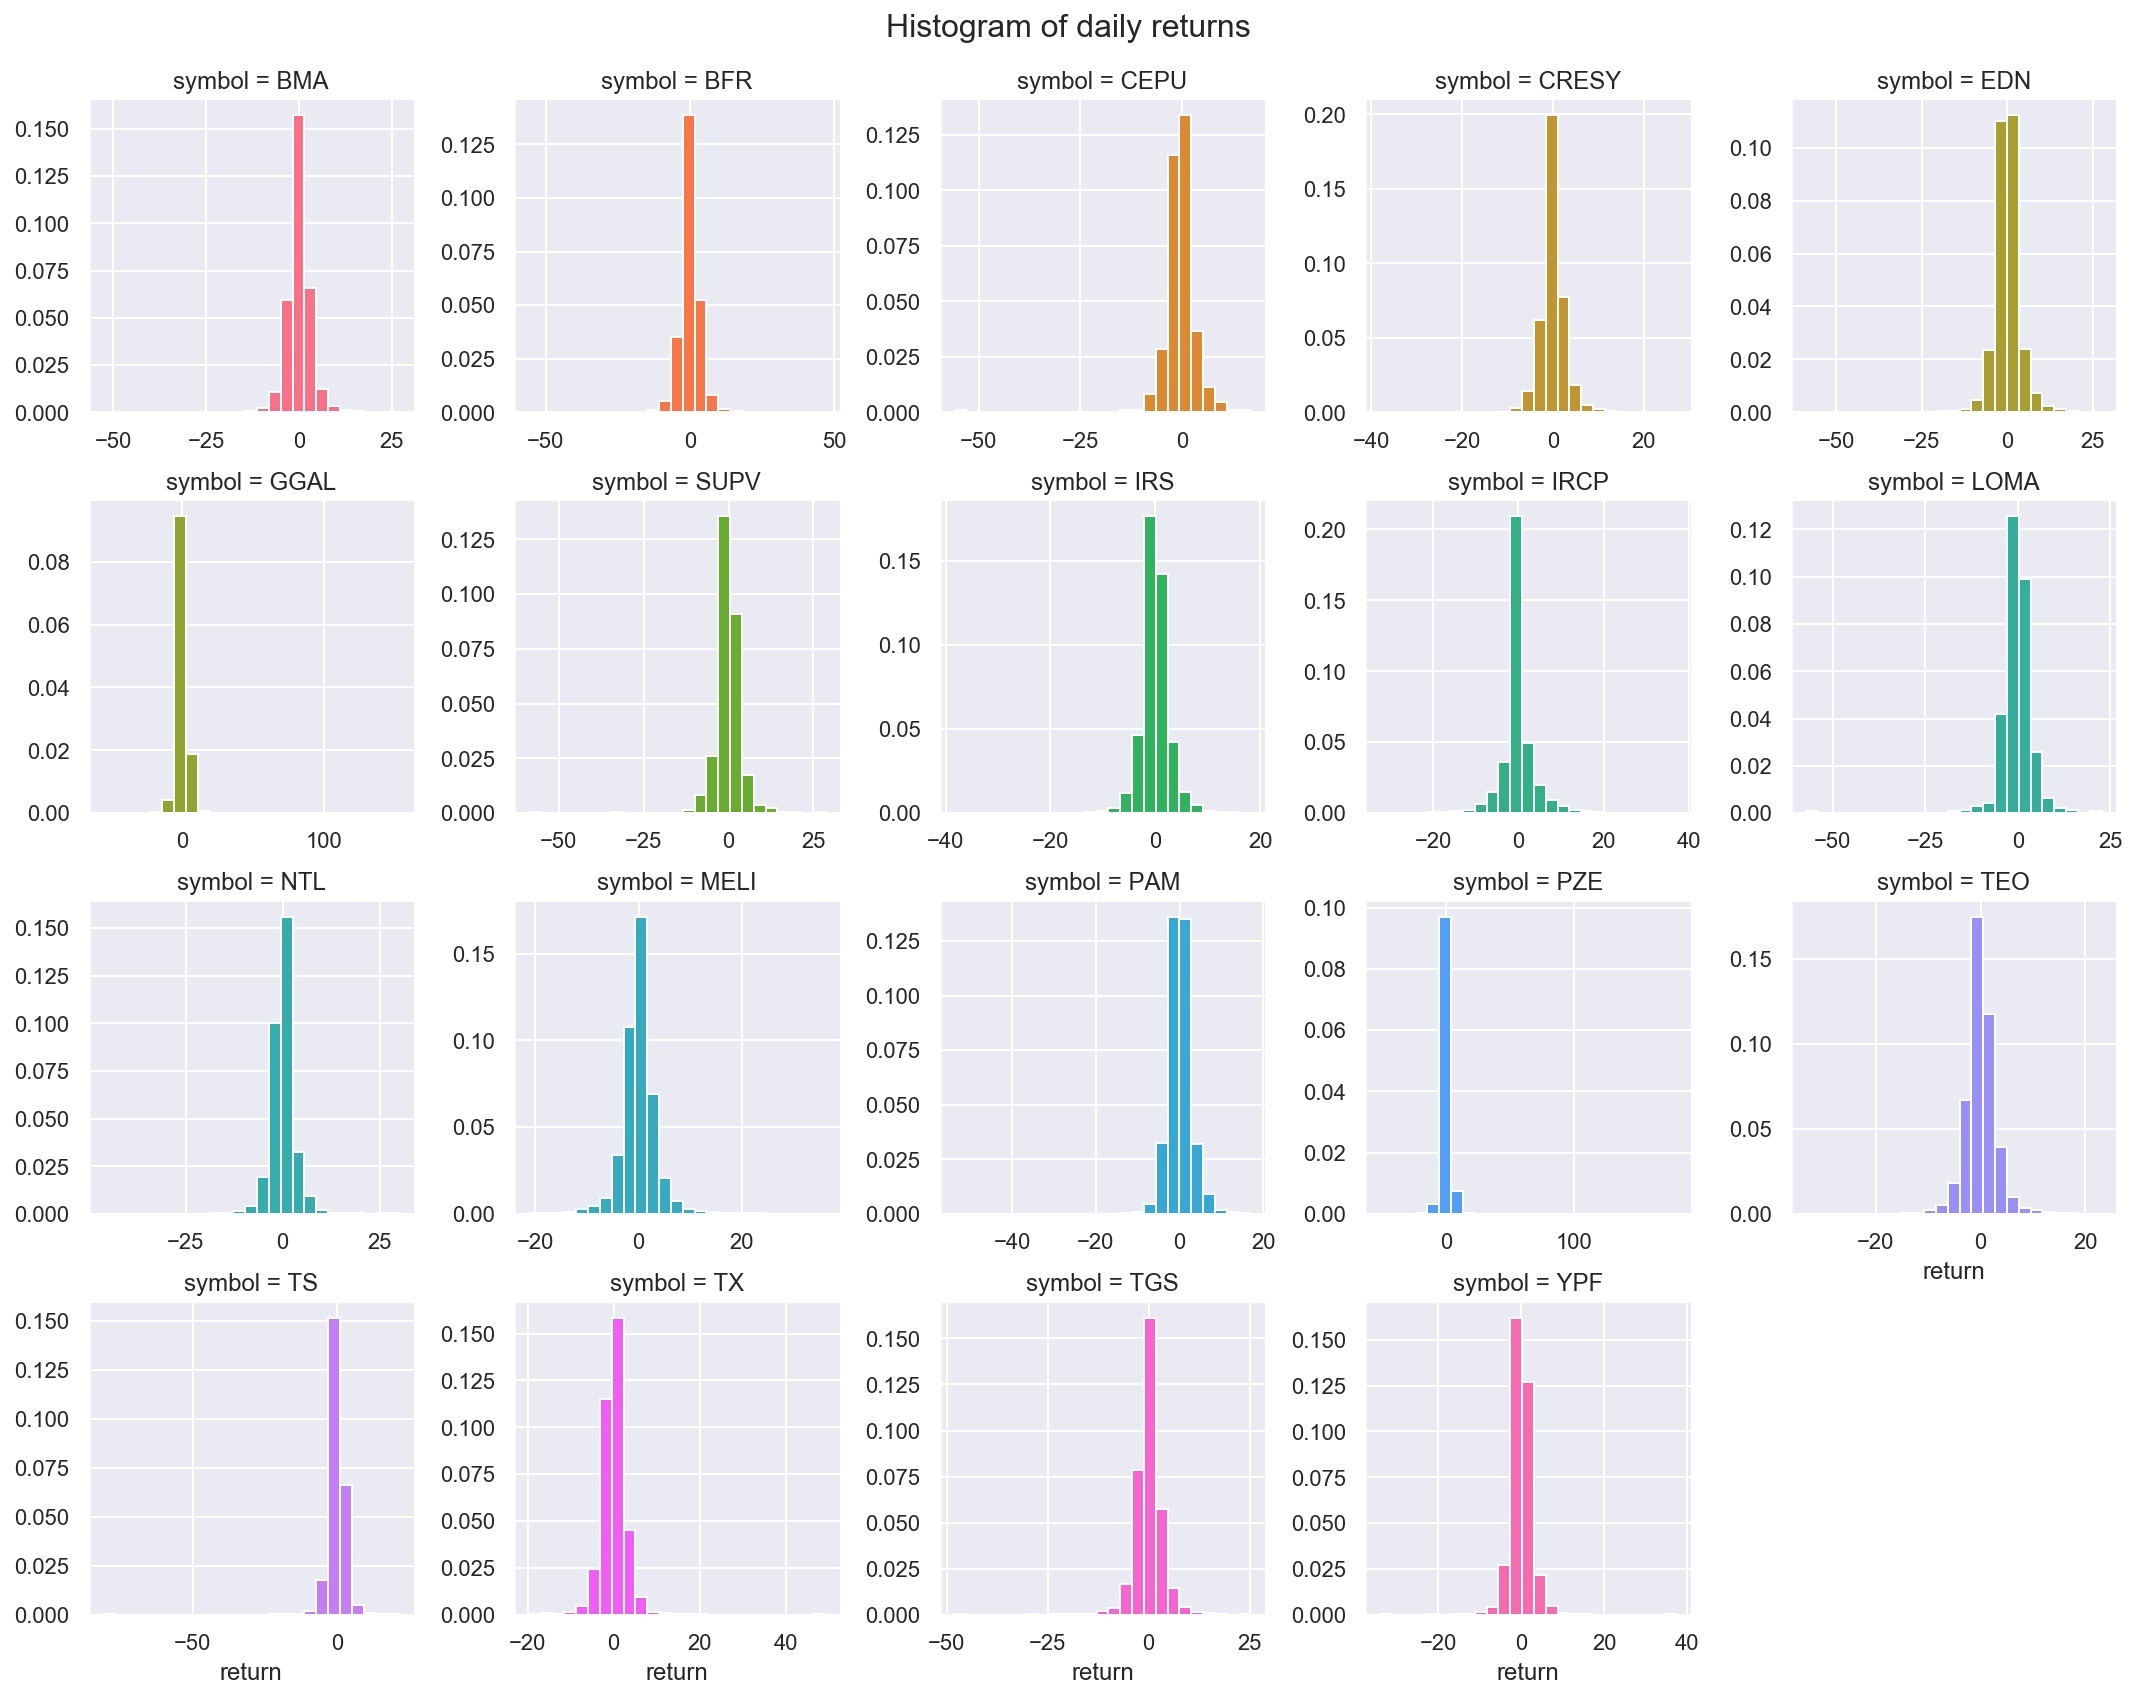

In [15]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol', sharey=False, sharex=False)
g.map(plt.hist, 'return', bins=25, density=True)

g.fig.suptitle('Histogram of daily returns', size=16)
g.fig.subplots_adjust(top=.93);

We see most returns cluster around 0, with a few outliers. We can visualize them using a [boxenplot](https://vita.had.co.nz/papers/letter-value-plot.html).

In [16]:
# Workaround to suppress matplotlib errors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

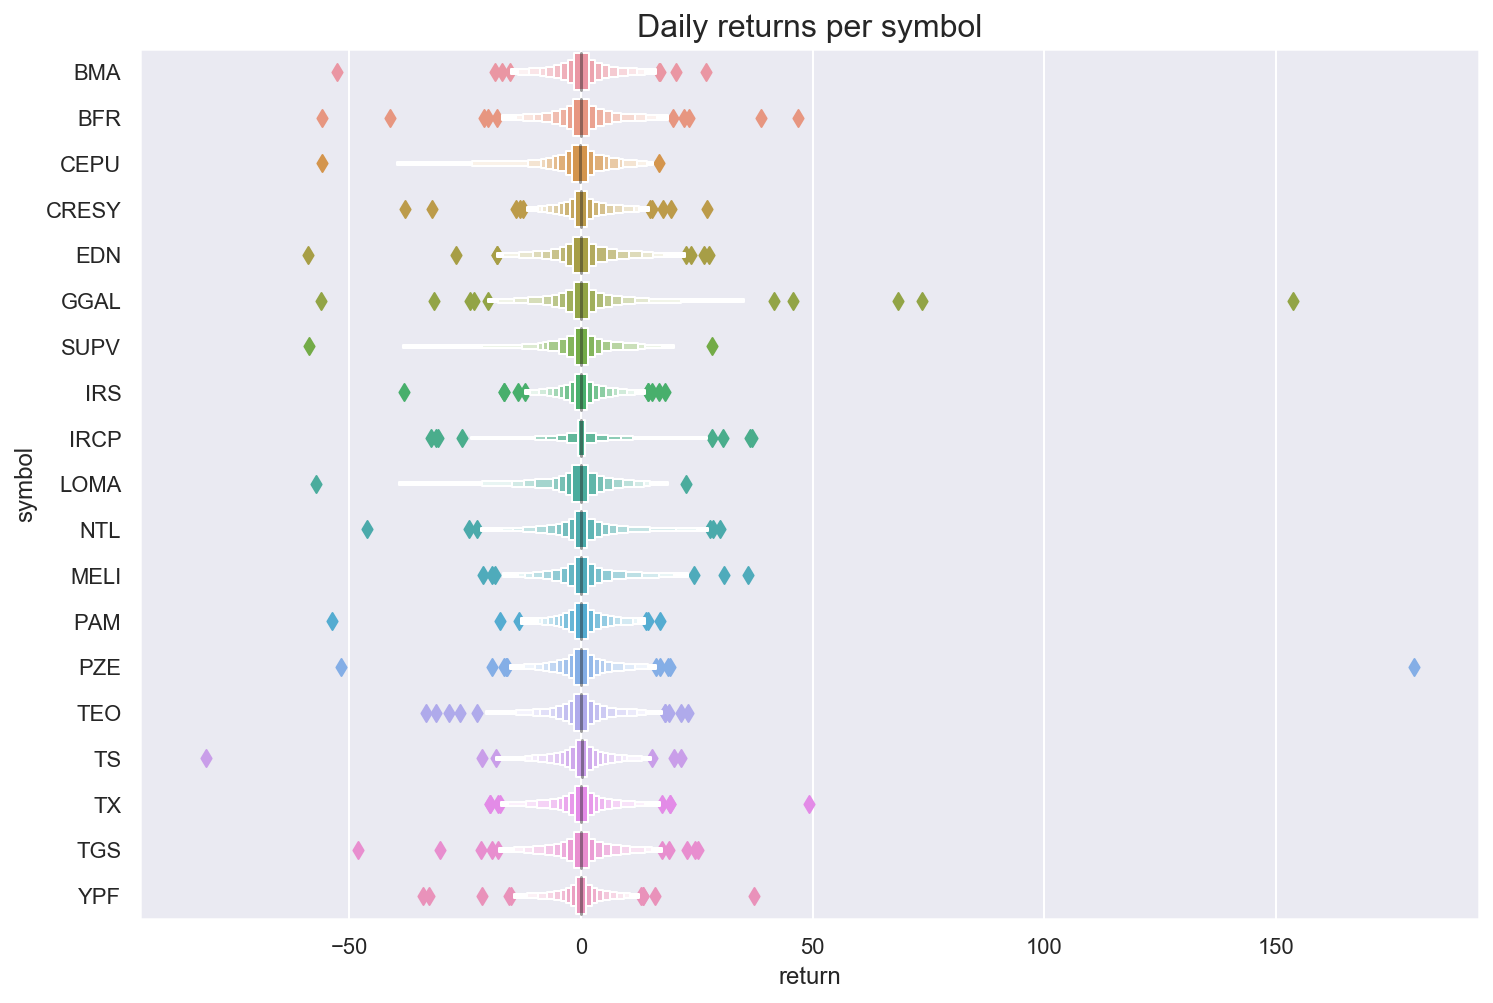

In [18]:
sns.boxenplot(y='symbol', x='return', data=adrs_df, scale='area', orient='h').set_title('Daily returns per symbol', size=16);

Now if we remove outliers, say discard days where return was higher than 10% or lower than -10%:

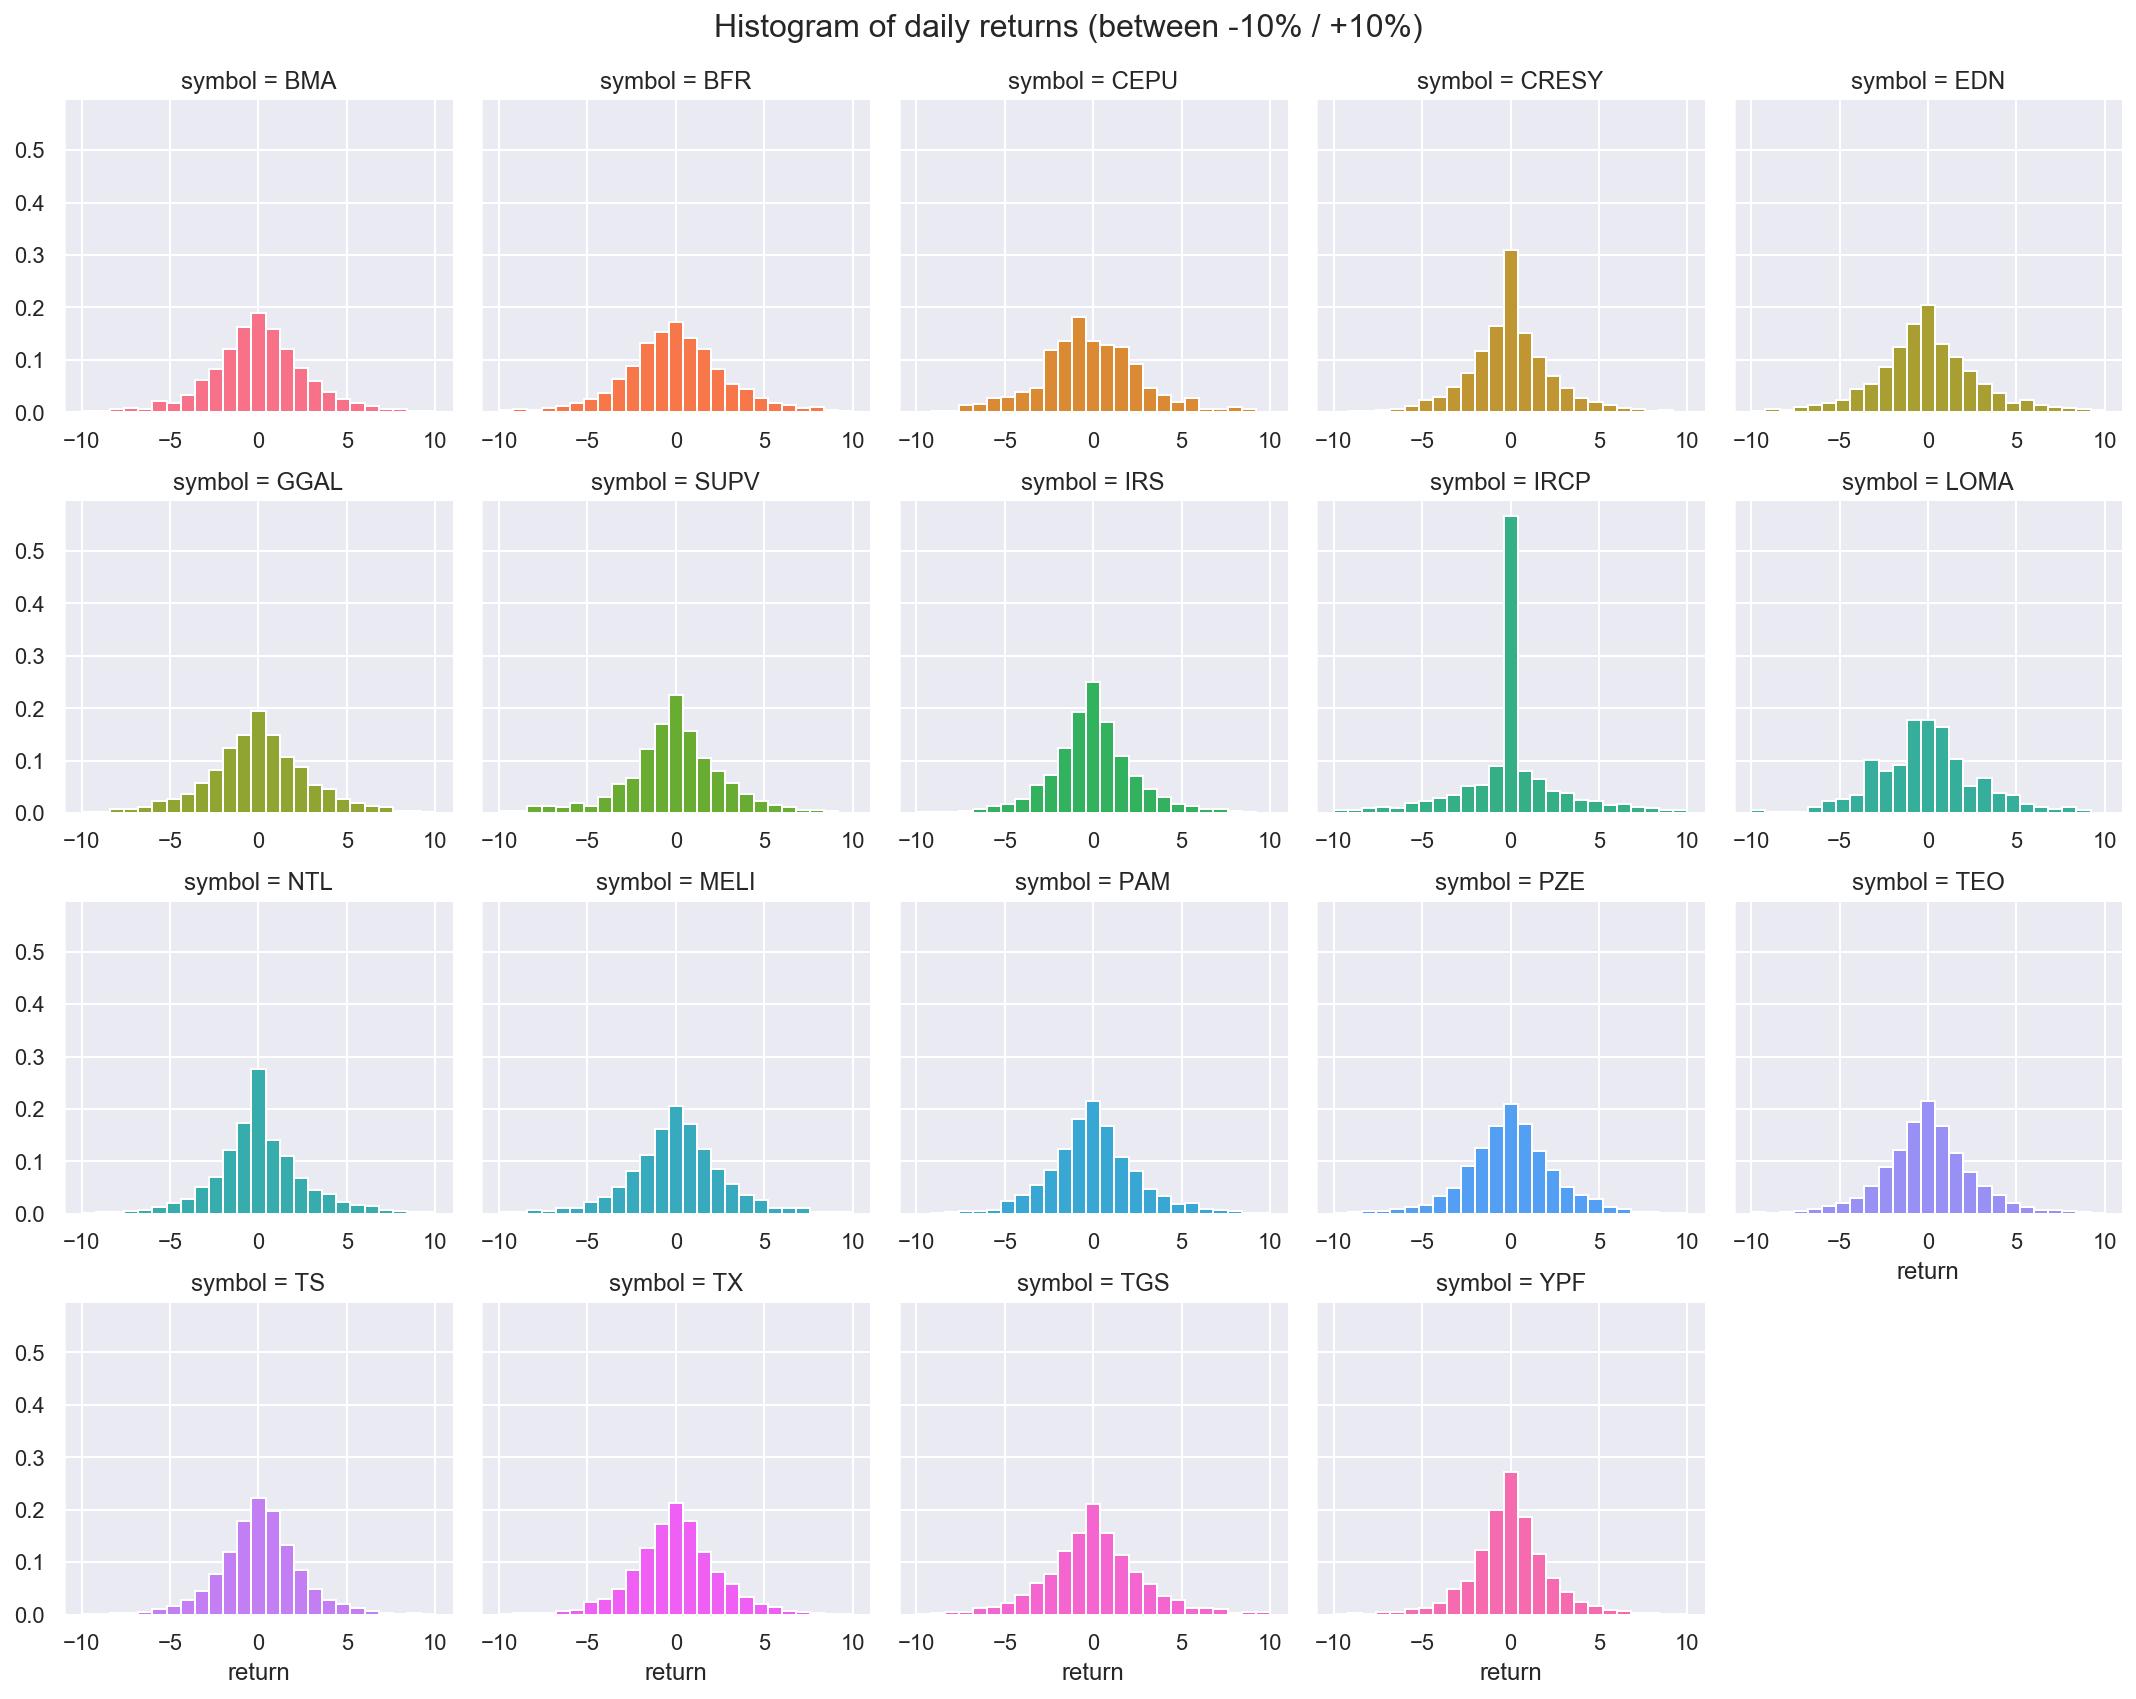

In [19]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol', sharex=False)
g.map(plt.hist, 'return', bins=25, density=True, range=(-10,10))

g.fig.suptitle('Histogram of daily returns (between -10% / +10%)', size=16)
g.fig.subplots_adjust(top=.93);

In finance, it is common to look at the _log returns_ of an asset. Stock prices are assumed to follow a [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution, hence we should expect log returns to be distributed [normally](https://en.wikipedia.org/wiki/Normal_distribution).  
You can read more on the distribution of prices and returns [here](https://www.investopedia.com/articles/investing/102014/lognormal-and-normal-distribution.asp).

In [13]:
adrs_df['log_return'] = np.log(adrs_df['return'] / 100 + 1.)

Now we calculate the [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) $\sigma$ for each symbol, defined as the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of log returns.

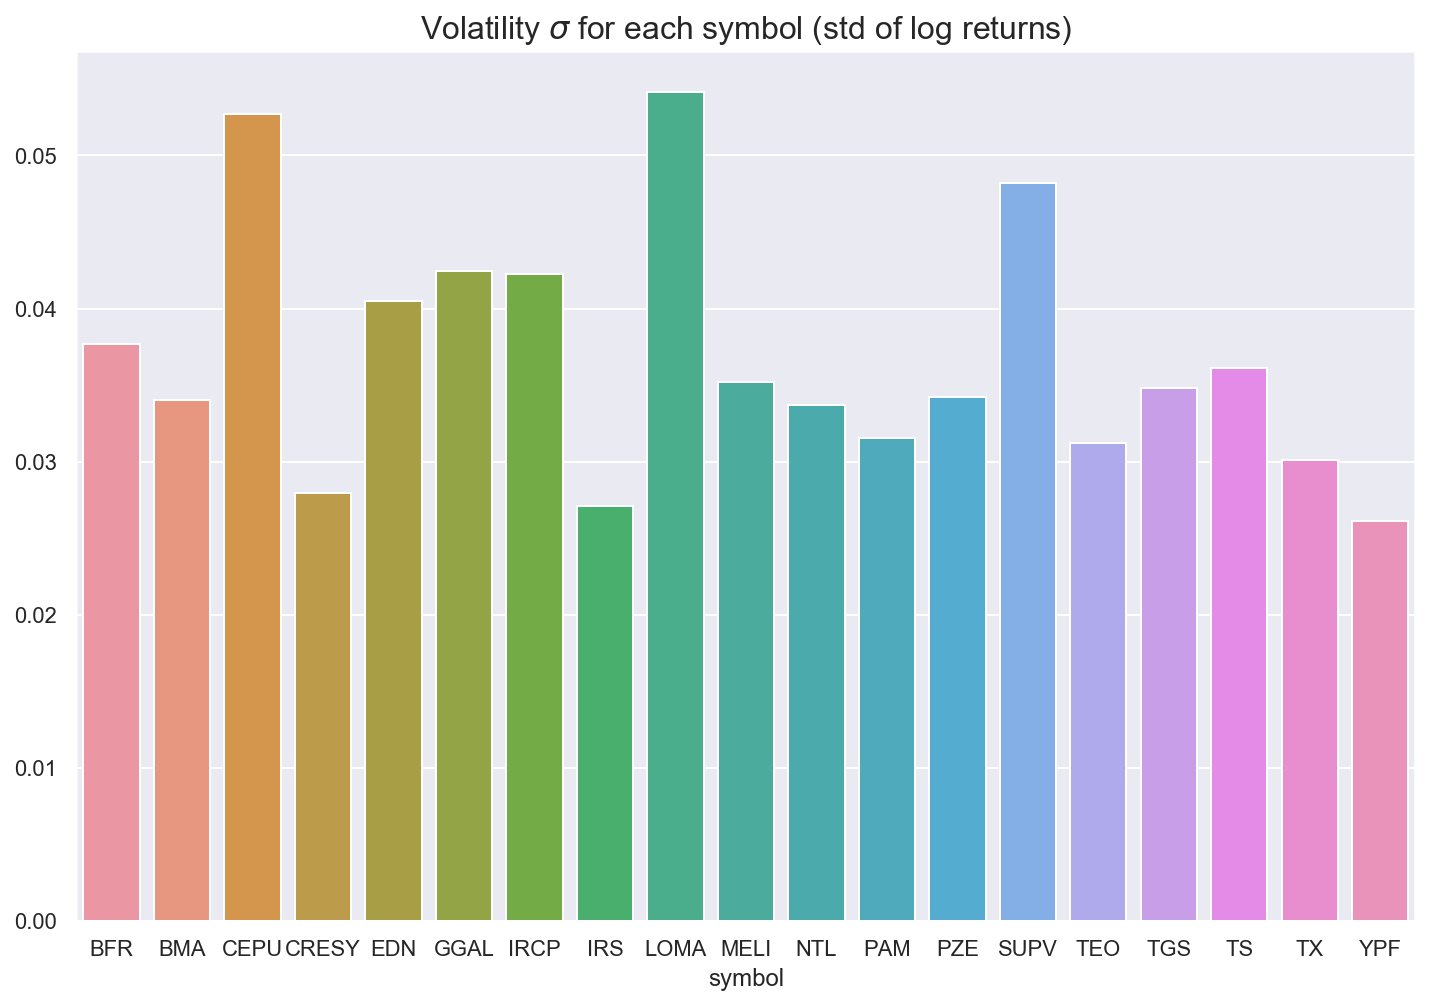

In [15]:
adr_volatility = adrs_df.groupby('symbol')['log_return'].std()
sns.barplot(x=adr_volatility.index, y=adr_volatility.values).set_title('Volatility $\sigma$ for each symbol (std of log returns)', size=16);

Let's plot the mean yearly returns for each symbol.

In [16]:
yearly_rets = np.exp(adrs_df.groupby('symbol')['log_return'].resample('Y', label='right').sum()) - 1
yearly_rets = yearly_rets.reset_index()
yearly_rets['return %'] = yearly_rets['log_return'] * 100

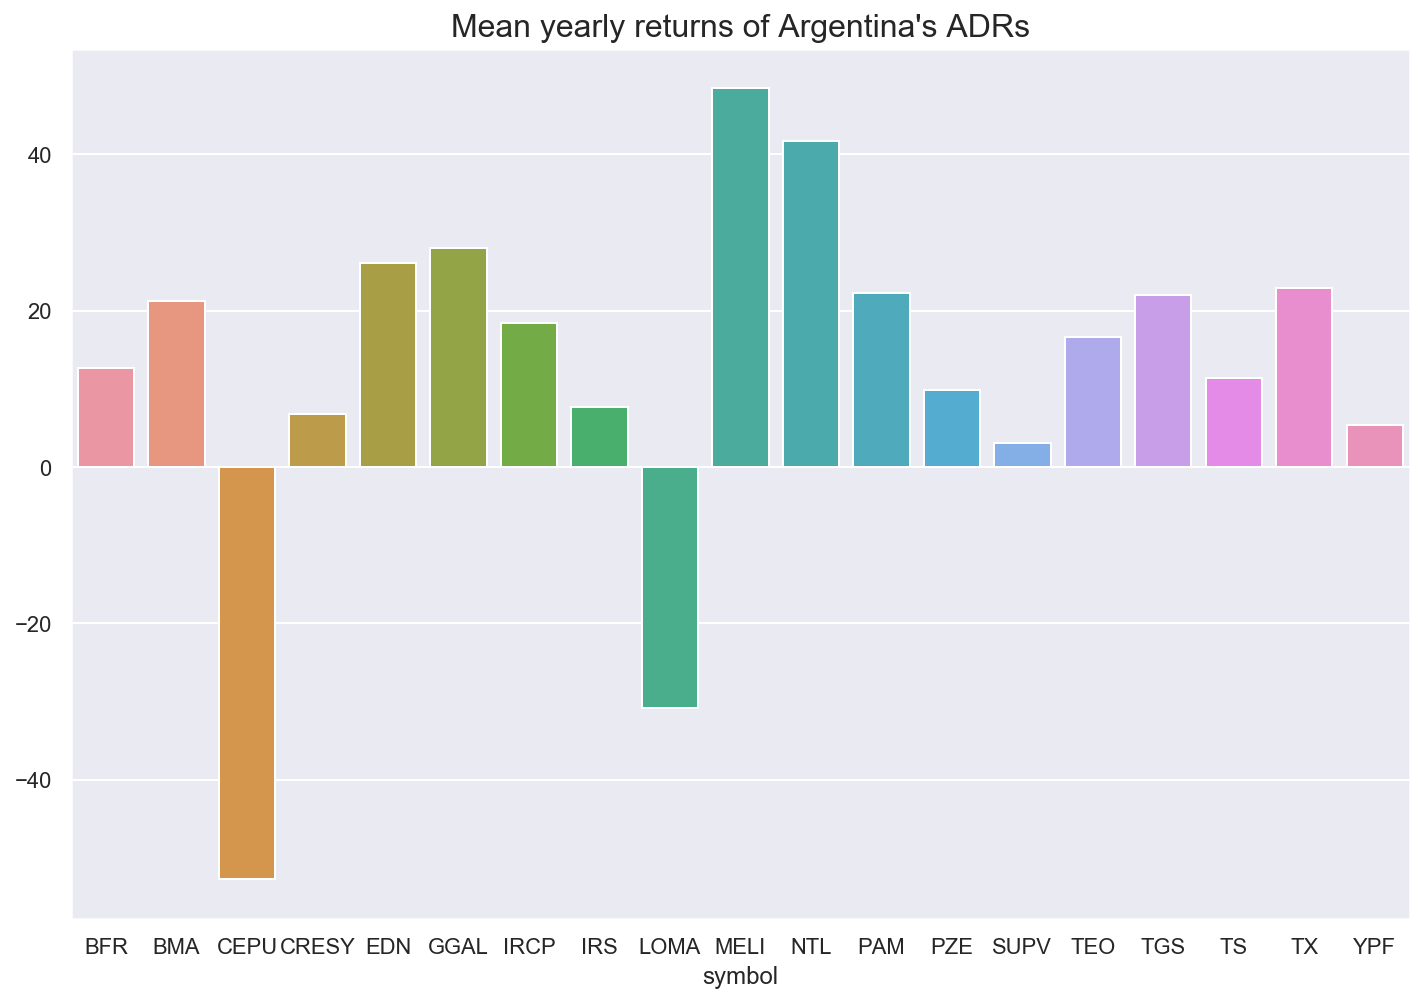

In [17]:
mean_rets = yearly_rets.groupby('symbol')['return %'].mean()
sns.barplot(x=mean_rets.index, y=mean_rets.values).set_title("Mean yearly returns of Argentina's ADRs", size=16);

### A closer look at outliers

Let's plot the returns that are $3\sigma$ away from the mean. If log returns were truly distributed normally, then we should expect $99.7\%$ of them to lie in the interval $(\mu_R - 3\sigma \mu_R, \mu_R + 3\sigma \mu_R)$.

In [18]:
def outlier_filter(symbol_df):
    symbol = symbol_df['symbol'].iloc[0]
    return symbol_df.loc[symbol_df['log_return'].abs() >= 3 * adr_volatility[symbol]]

outliers = adrs_df.groupby('symbol').apply(outlier_filter).reset_index(level=0, drop=True)

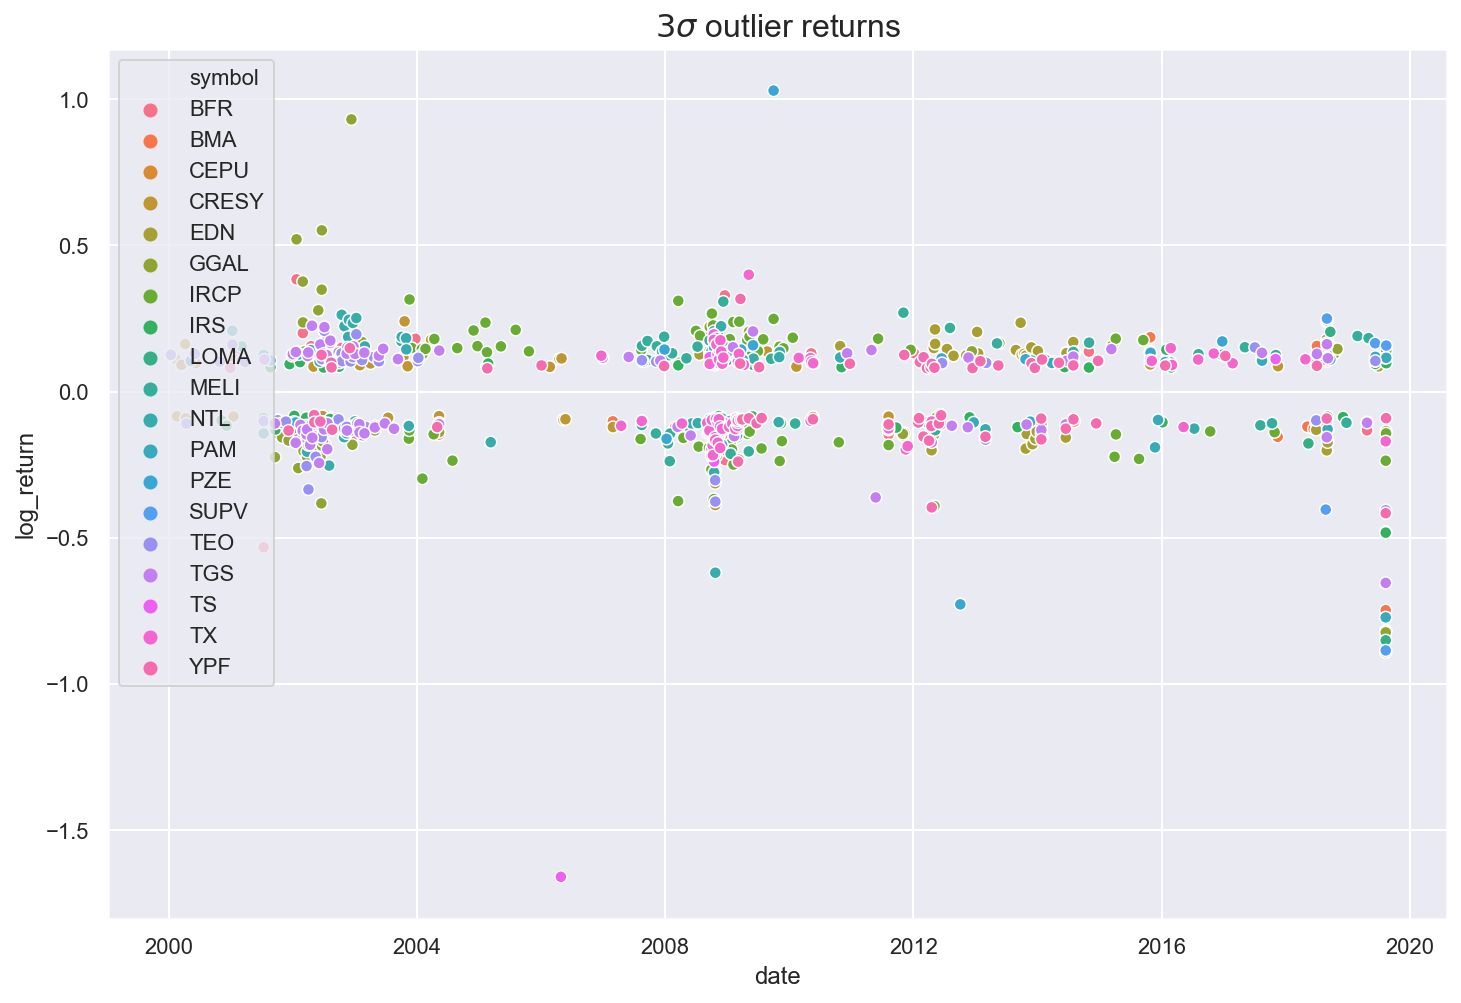

In [19]:
sns.scatterplot(x=outliers.index, y='log_return', hue='symbol', data=outliers).set_title('$3\sigma$ outlier returns', size=16);

Let's see the proportion of outlier returns for each symbol in the data.

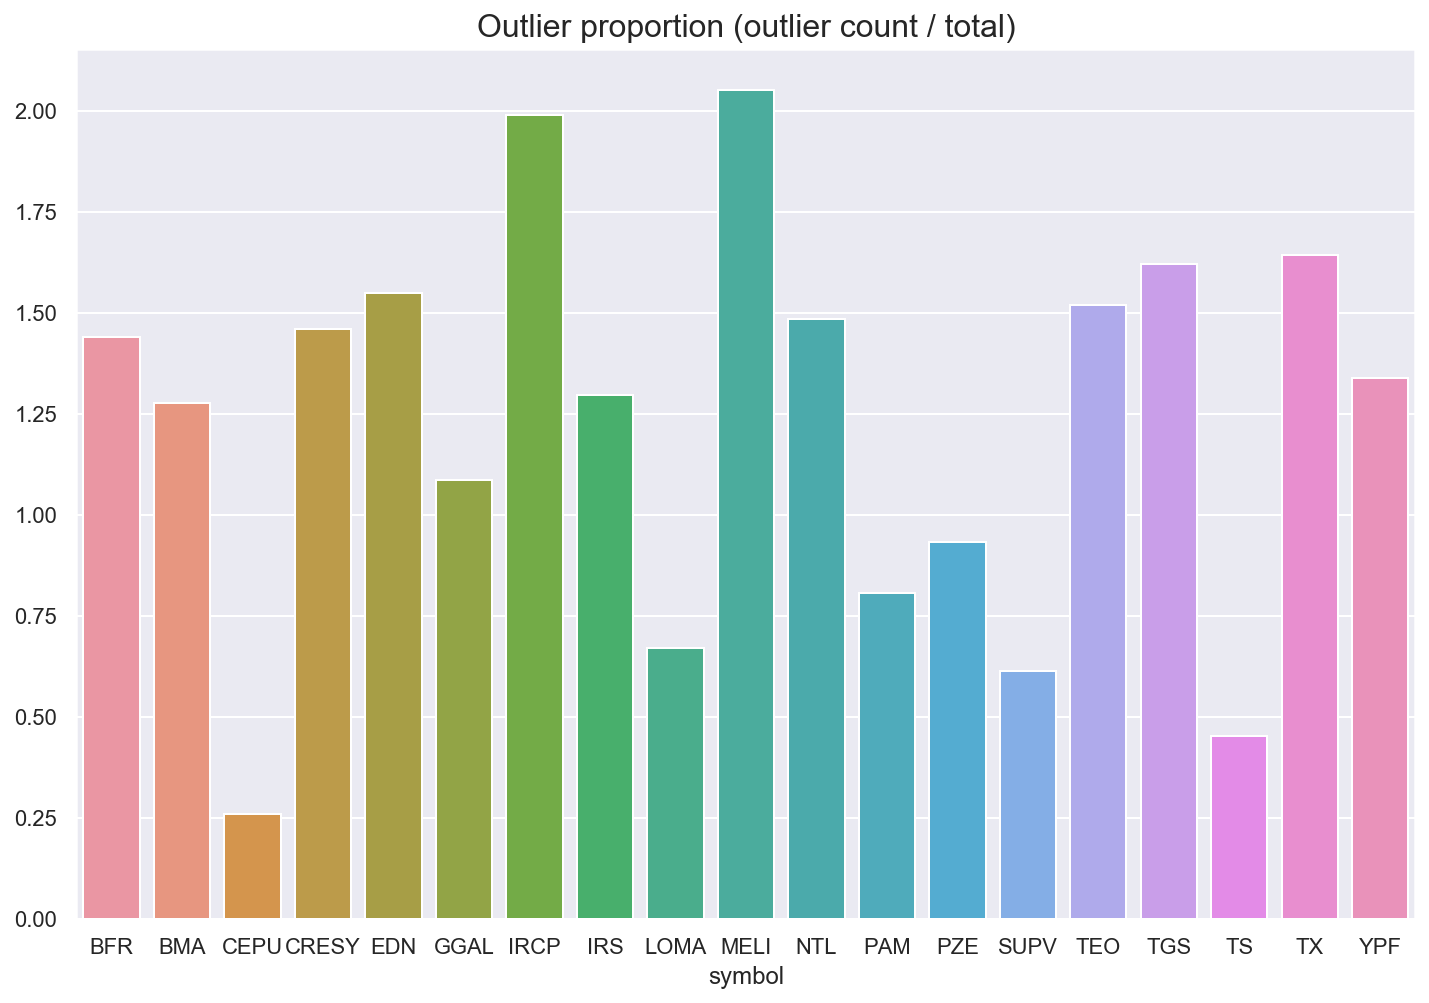

In [29]:
outlier_count = outliers.groupby('symbol')['log_return'].count()
ret_count = adrs_df.groupby('symbol')['log_return'].count()

outlier_pct = 100 * outlier_count / ret_count
sns.barplot(x=outlier_pct.index, y=outlier_pct.values).set_title('Outlier proportion (outlier count / total)', size=16);

We see many more outliers than expected. \$MELI has almost 7 times more outlier return days than expected if we assumed normal log returns.

Finally, we'll look at the cumulative log returns over time.

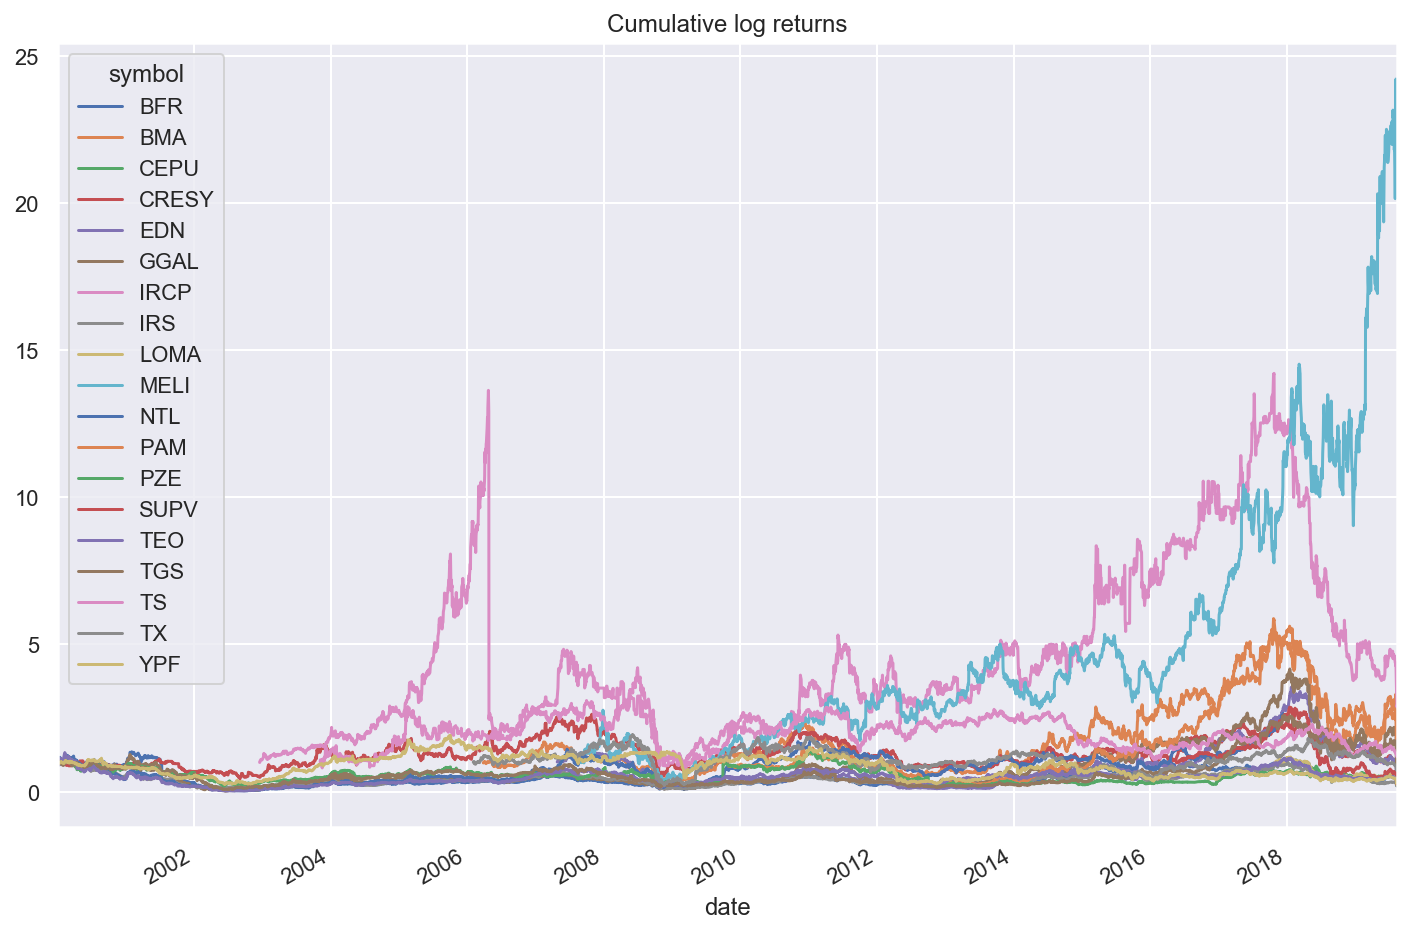

In [32]:
pivoted = adrs_df.pivot(columns='symbol', values='log_return')
pivoted.cumsum().apply(np.exp).plot(title='Cumulative log returns');

### ADR options and the volatility smile

Now we'll examine the options end-of-day data for the ADRs. [Options](https://www.investopedia.com/terms/o/option.asp) are derivative contracts based on an underlying asset such as stocks. They offer the buyer the opportunity to buy or sell the underlying asset.

In [20]:
adr_options = pd.read_csv(os.path.join(data_dir, 'adr_options.csv'), index_col='quotedate', parse_dates=['quotedate', 'expiration'])
adr_options.head()

underlying  underlying_last exchange          optionroot  type  \
quotedate                                                                   
2019-07-03        TEO            17.79     CBOE  TEO190719C00002500  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00005000  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00007500  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00010000  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00012500  call   

           expiration  strike  last  net   bid   ask  volume  openinterest  \
quotedate                                                                    
2019-07-03 2019-07-19     2.5   0.0  0.0  13.0  17.8       0             0   
2019-07-03 2019-07-19     5.0   0.0  0.0  10.5  15.2       0             0   
2019-07-03 2019-07-19     7.5   0.0  0.0   8.0  12.8       0             0   
2019-07-03 2019-07-19    10.0   0.0  0.0   5.5  10.2       0             0   
2019-07-03 2019-07-19    12.5   0.0  0.0   3.0   7.8       0           199   

            impliedvol   delta   gamma  
quotedate                               
2019-07-03      0.0200  1.0000  0.0000  
2019-07-03      6.3229  0.9446  0.0045  
2019-07-03      3.5717  0.9336  0.0093  
2019-07-03      2.0354  0.9375  0.0156  
2019-07-03      1.2856  0.9215  0.0297

Let's plot the [volatility smile](https://www.investopedia.com/terms/v/volatilitysmile.asp) for each symbol at 2019-08-09.  
The volatility smile plots the [implied volatility](https://www.investopedia.com/terms/i/iv.asp) (IV, a measure of the volatility of an underlying security as _implied_ by the option prices) at the different strike levels.  
We'll plot the IV for puts and calls for each symbol. The dashed line represents the spot price.

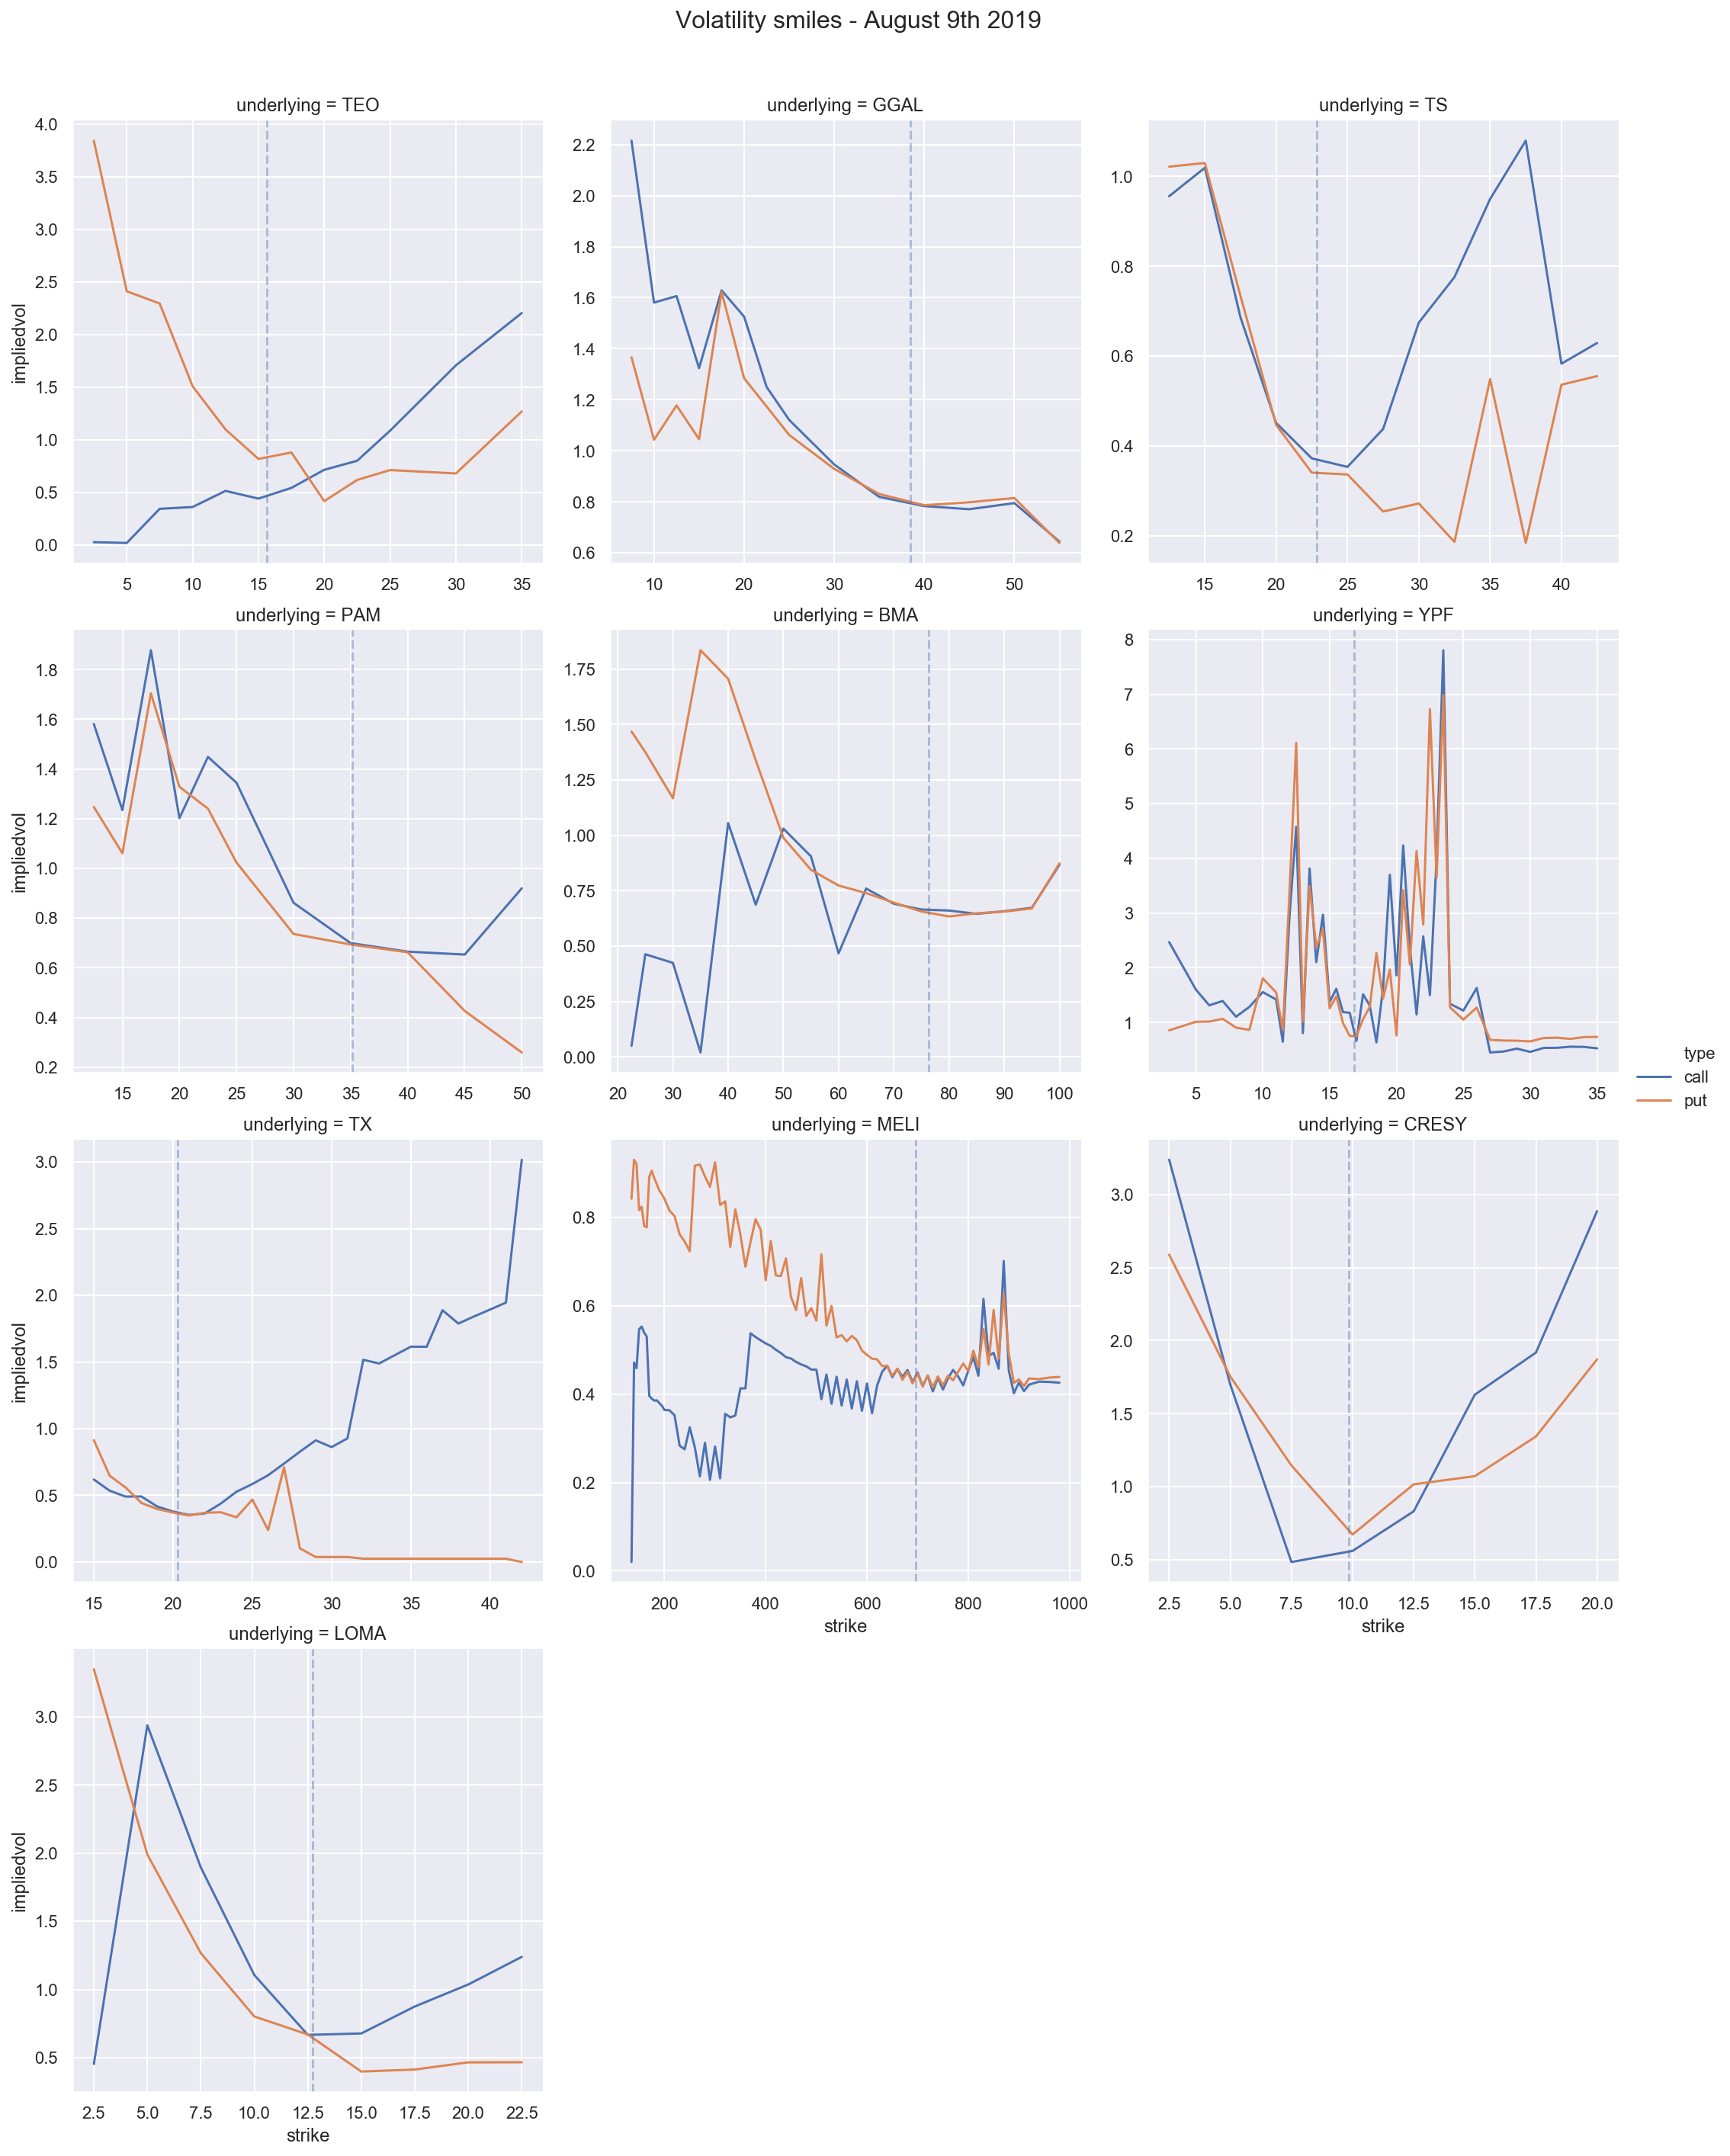

In [34]:
friday_9th = adr_options.loc['2019-08-9']

g = sns.relplot(x='strike', y='impliedvol', col='underlying', hue='type',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3,
            kind='line', data=friday_9th, ci=None)

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = friday_9th.loc[friday_9th['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')
    
g.fig.suptitle('Volatility smiles - August 9th 2019', size=16)
g.fig.subplots_adjust(top=.94);

We see that as options move more [an the money](https://www.investopedia.com/terms/a/atthemoney.asp) (ATM) their implied volatility drops. In contrast, options that are further [out of the money](https://www.investopedia.com/terms/o/outofthemoney.asp) (OTM) or in the money (ITM) have higher IVs.

Now let's try the the same plot for the following Monday (2019-08-12). That day, the [MERVAL](https://en.wikipedia.org/wiki/MERVAL) (an index that tracks the biggest companies listed in the Buenos Aires Stock Exchange) crashed and lost close to 50% of its USD value.

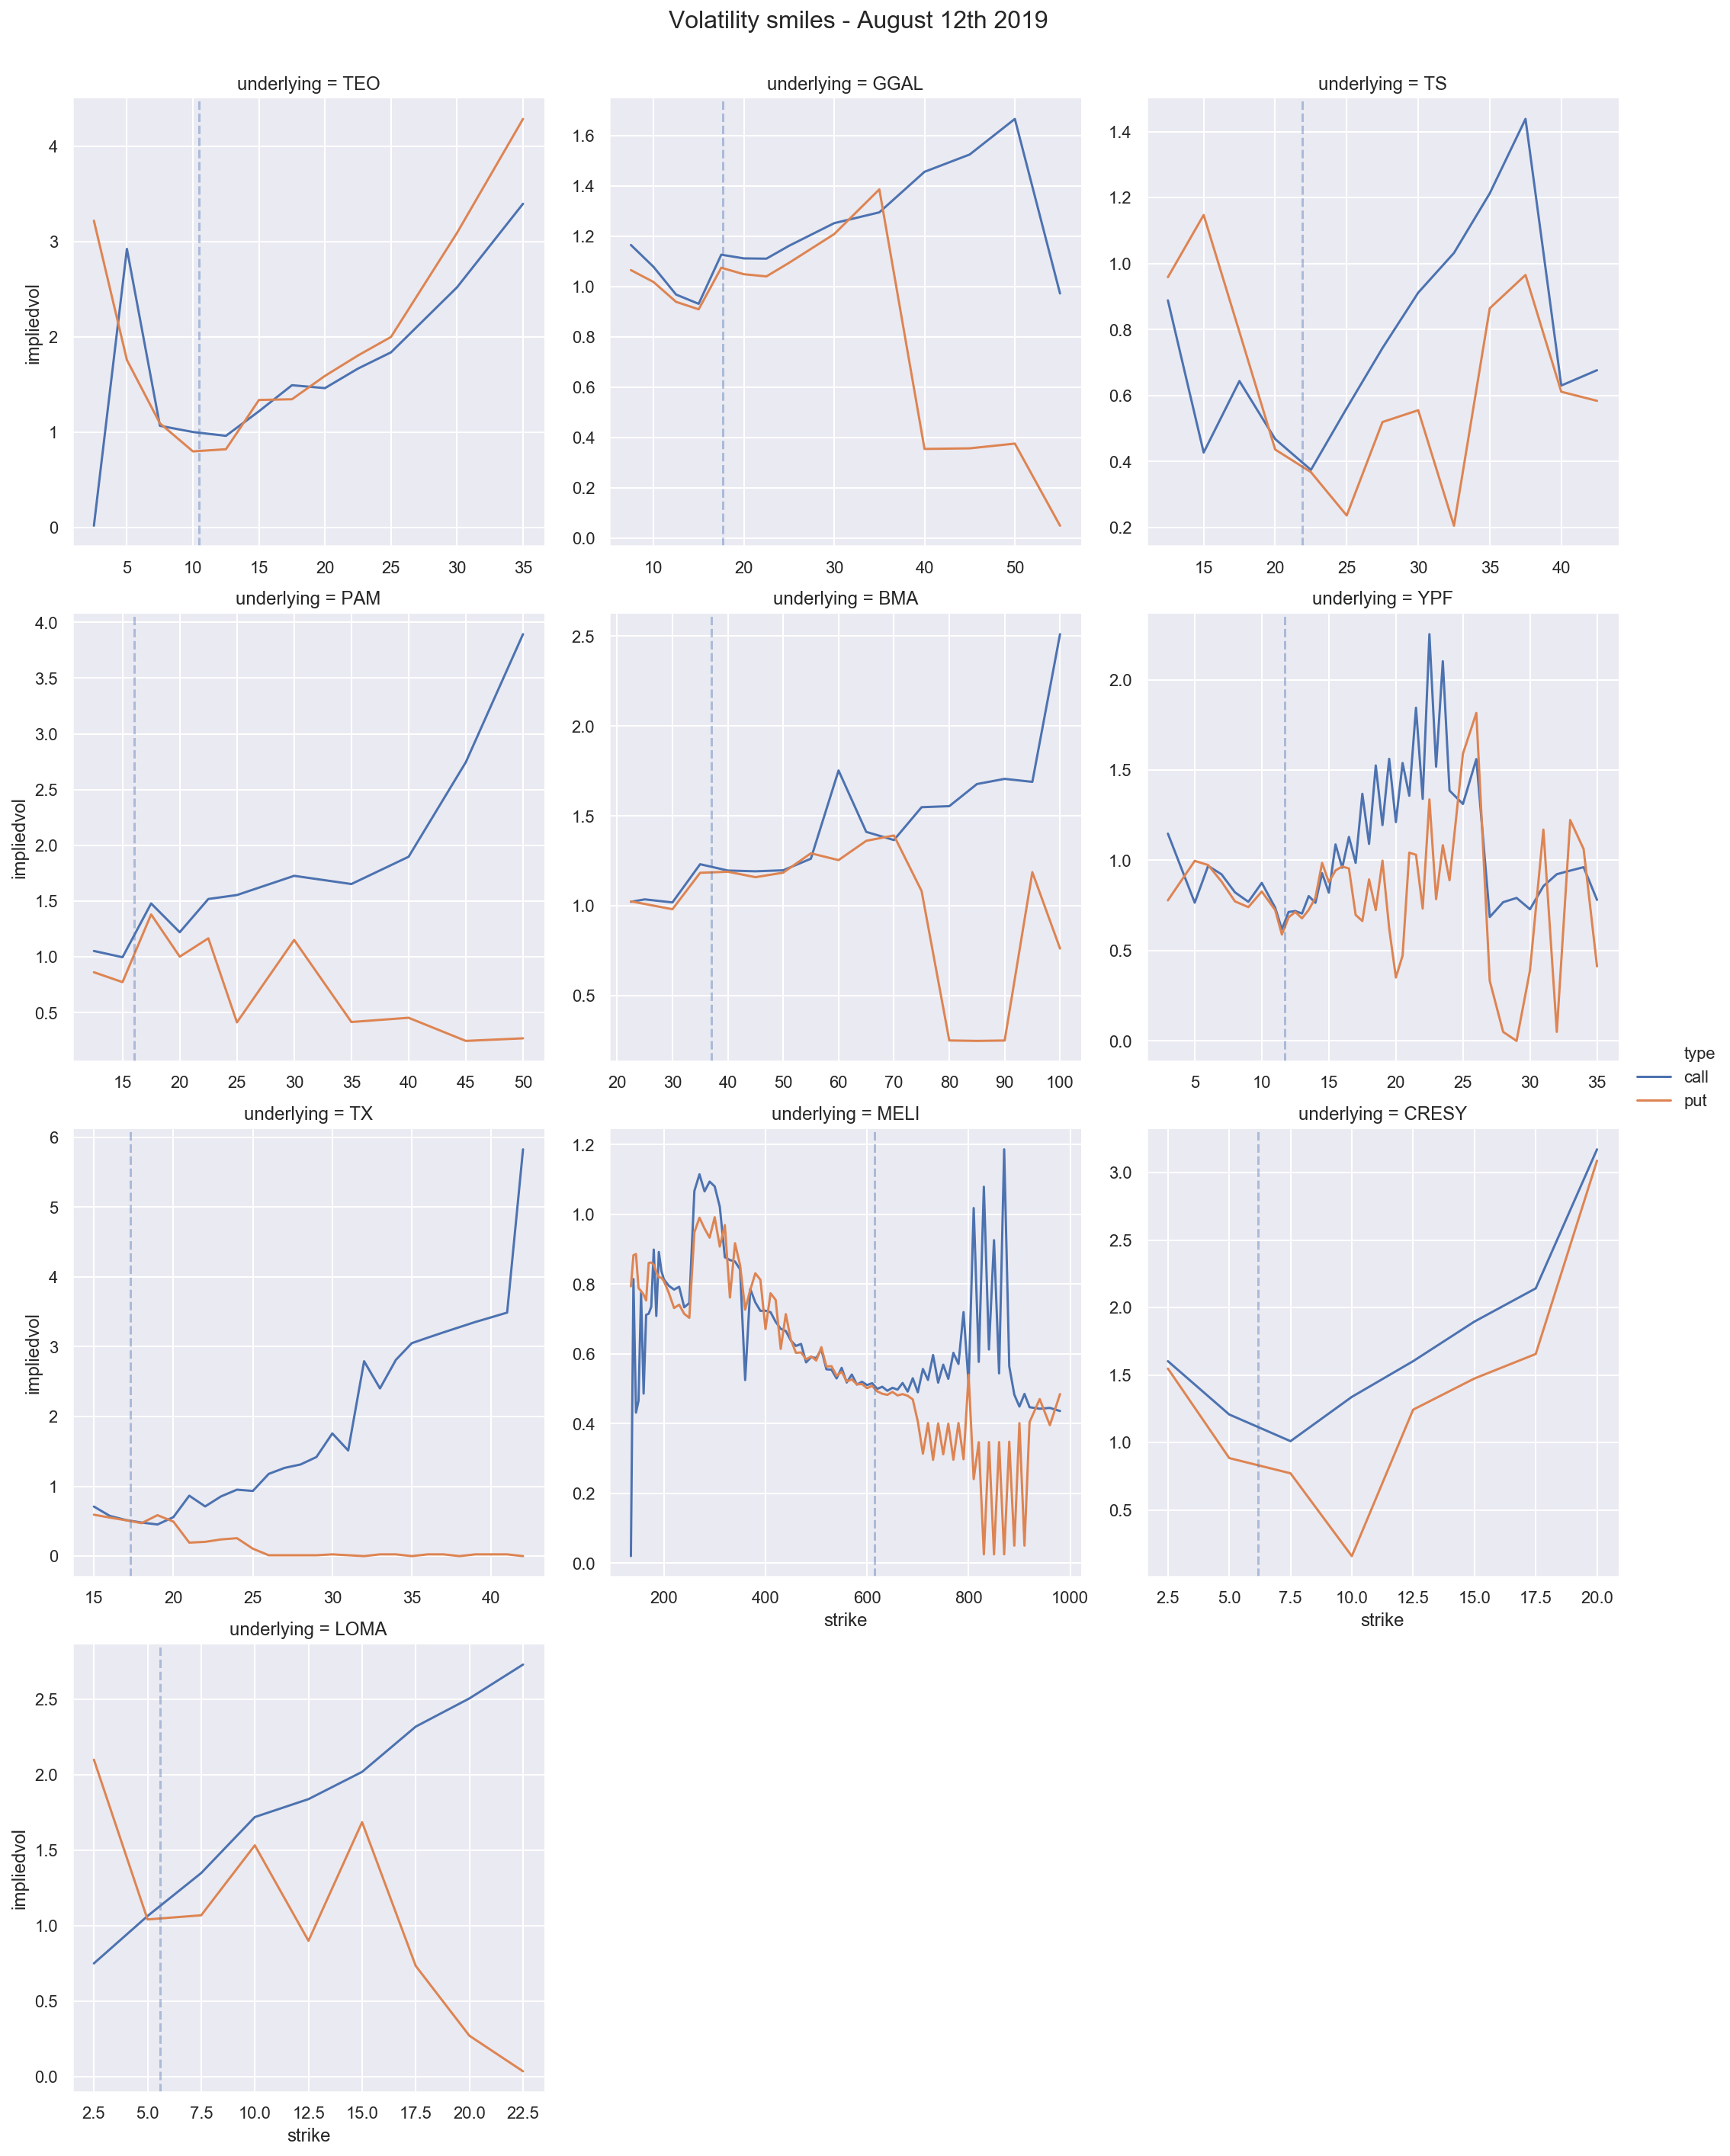

In [35]:
black_monday = adr_options.loc['2019-08-12']
g = sns.relplot(x='strike', y='impliedvol', col='underlying', hue='type',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3,
            kind='line', data=black_monday, ci=None)

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = black_monday.loc[black_monday['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')
    
g.fig.suptitle('Volatility smiles - August 12th 2019', size=16)
g.fig.subplots_adjust(top=.94);

### Option price evolution

Next, we'll analyse how option prices changed during the month of August, 2019.
Let's find the 10 most actively traded options (those with the highest open interest) for each symbol at the start of the month.

In [36]:
august_options = adr_options.loc['2019-08']

In [37]:
def filter_active(symbol_df, option_type='call'):
    return symbol_df.loc[symbol_df['type'] == option_type].nlargest(n=10, columns='openinterest')

month_start_date = august_options.index.min()
first_trading_day = august_options.loc[month_start_date]
most_active_calls = first_trading_day.groupby('underlying').apply(filter_active).reset_index(level=0, drop=True)
most_active_puts = first_trading_day.groupby('underlying').apply(lambda df: filter_active(df, 'put')).reset_index(level=0, drop=True)

In [38]:
call_contracts = most_active_calls['optionroot']
put_contracts = most_active_puts['optionroot']

In [40]:
august_active_calls = august_options.loc[august_options['optionroot'].isin(call_contracts)]
august_active_puts = august_options.loc[august_options['optionroot'].isin(put_contracts)]

august_active_calls['day'] = august_active_calls.index.strftime('%d')
august_active_puts['day'] = august_active_puts.index.strftime('%d')

We'll plot the evolution of the ask price for the actively traded calls through August 2019.

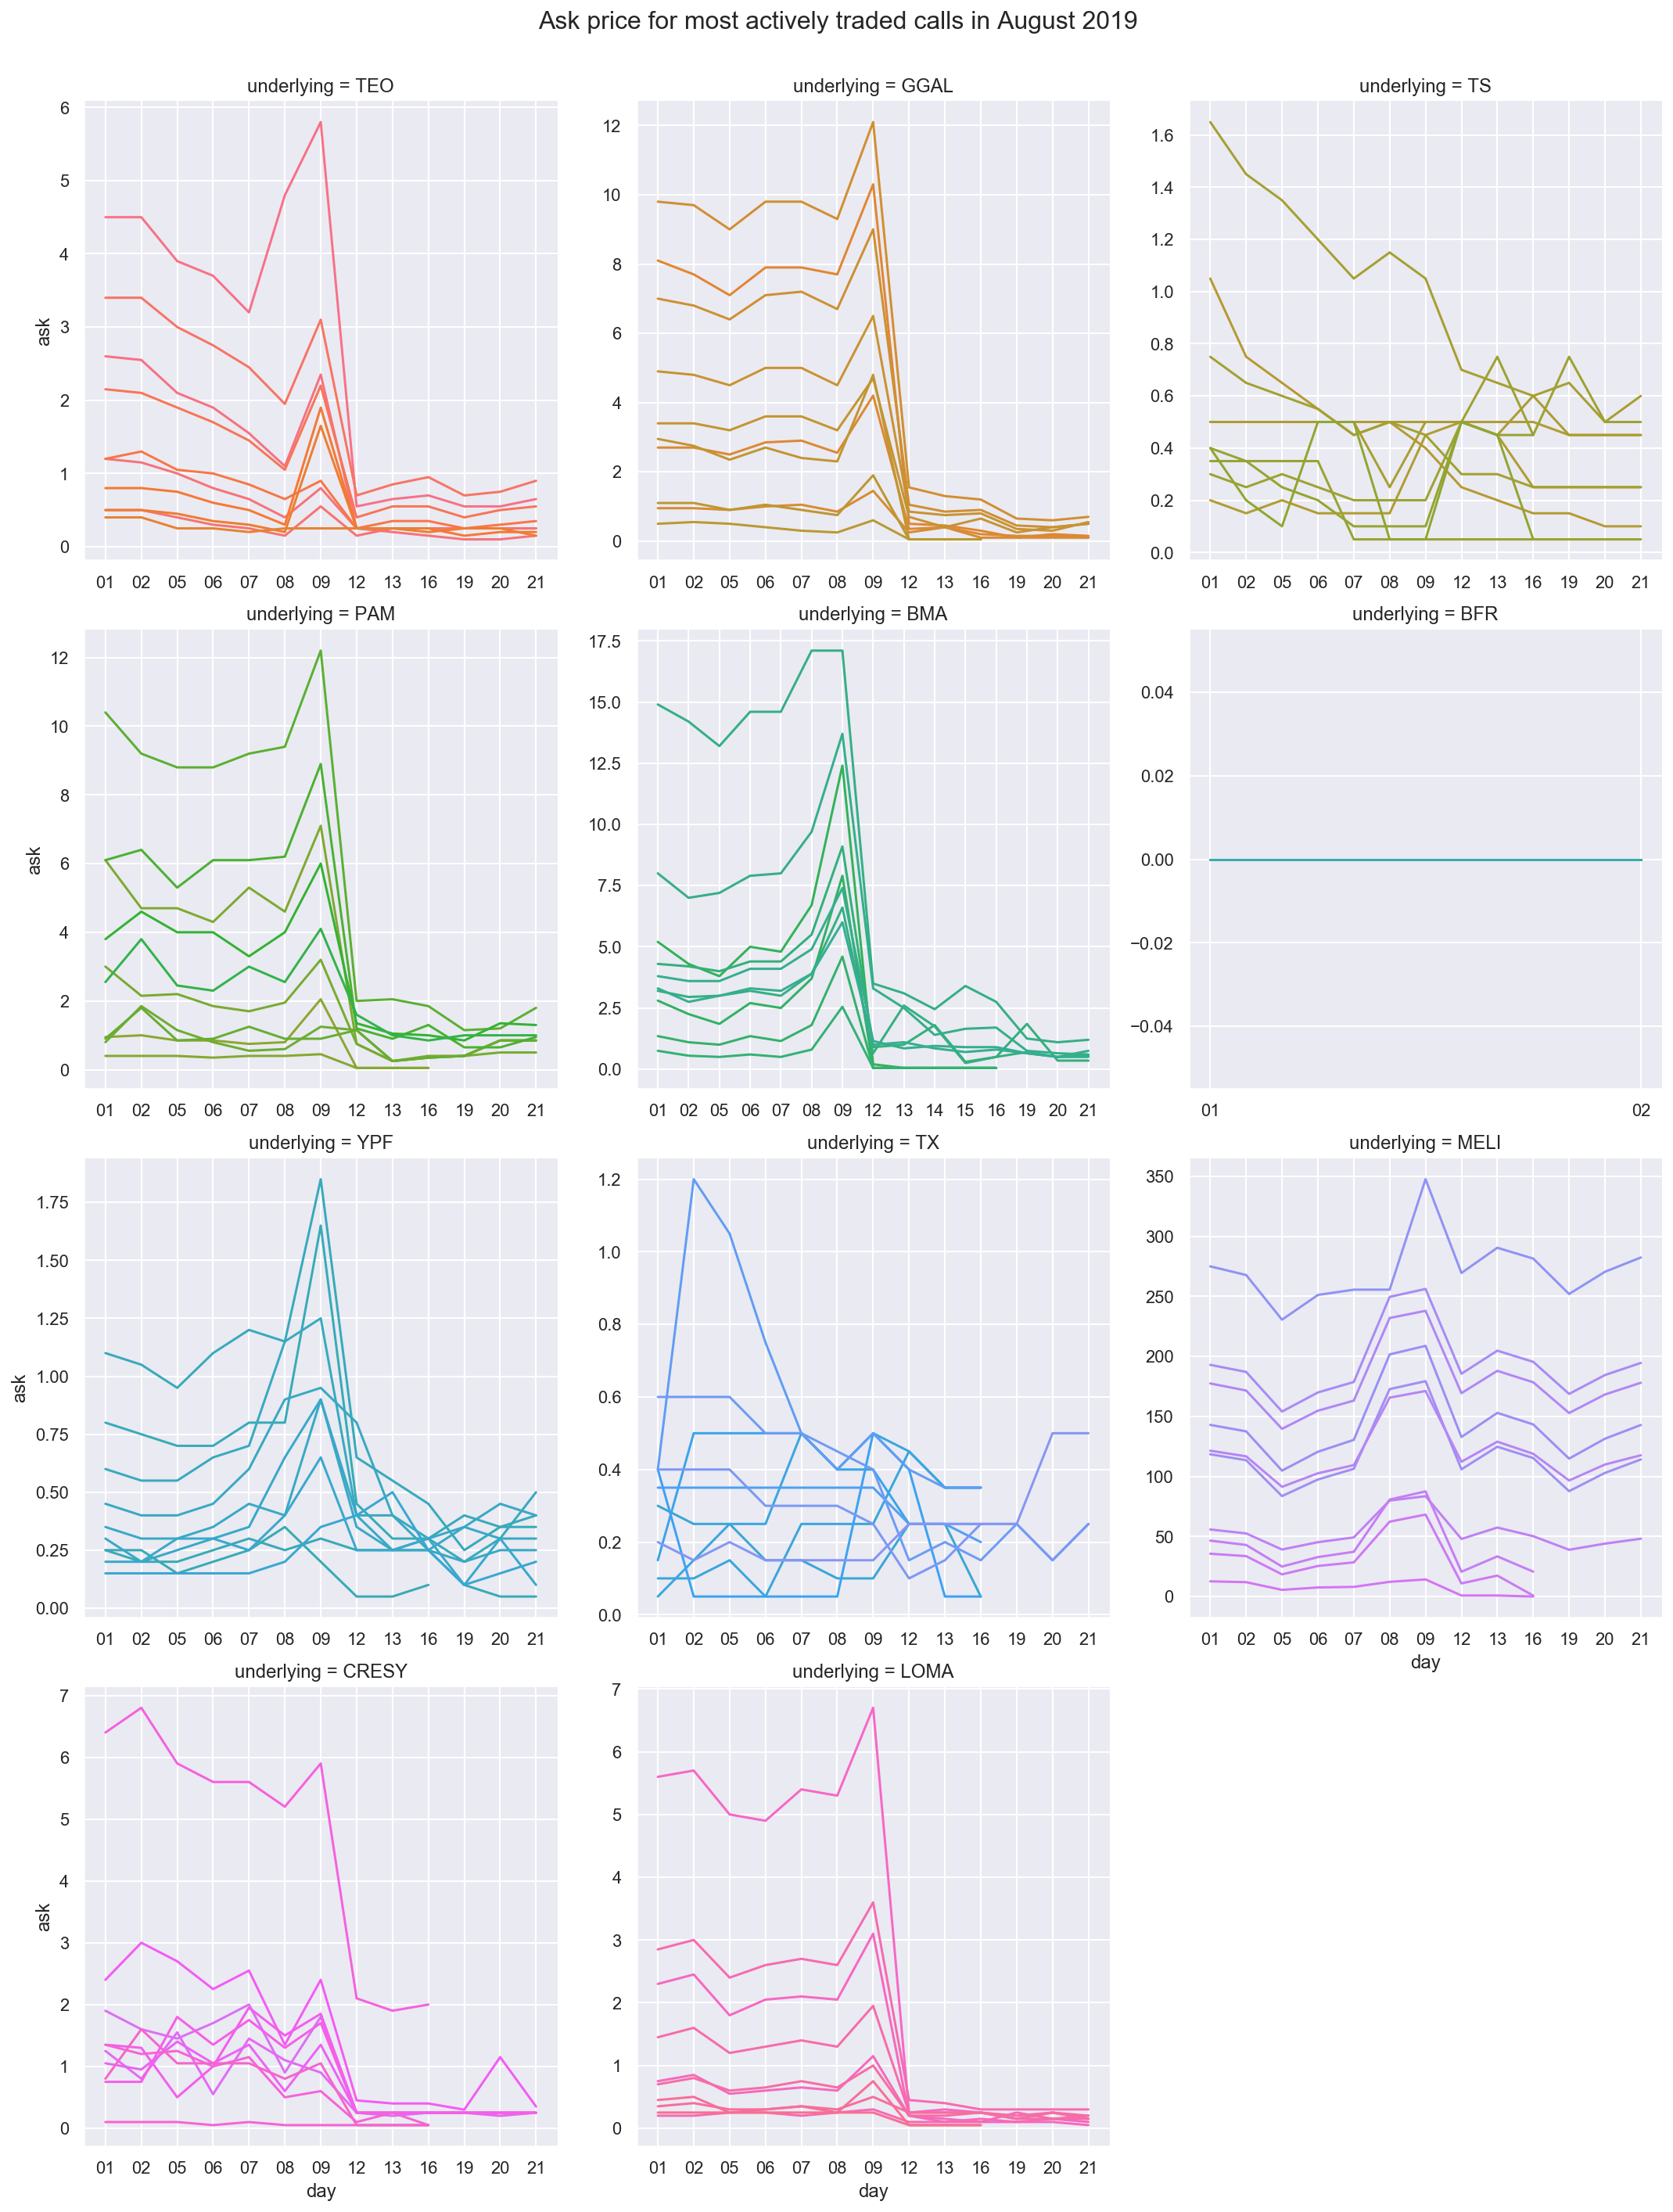

In [41]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=august_active_calls, ci=None)

g.fig.suptitle('Ask price for most actively traded calls in August 2019', size=16)
g.fig.subplots_adjust(top=0.94);

Let's try the same plot for puts.

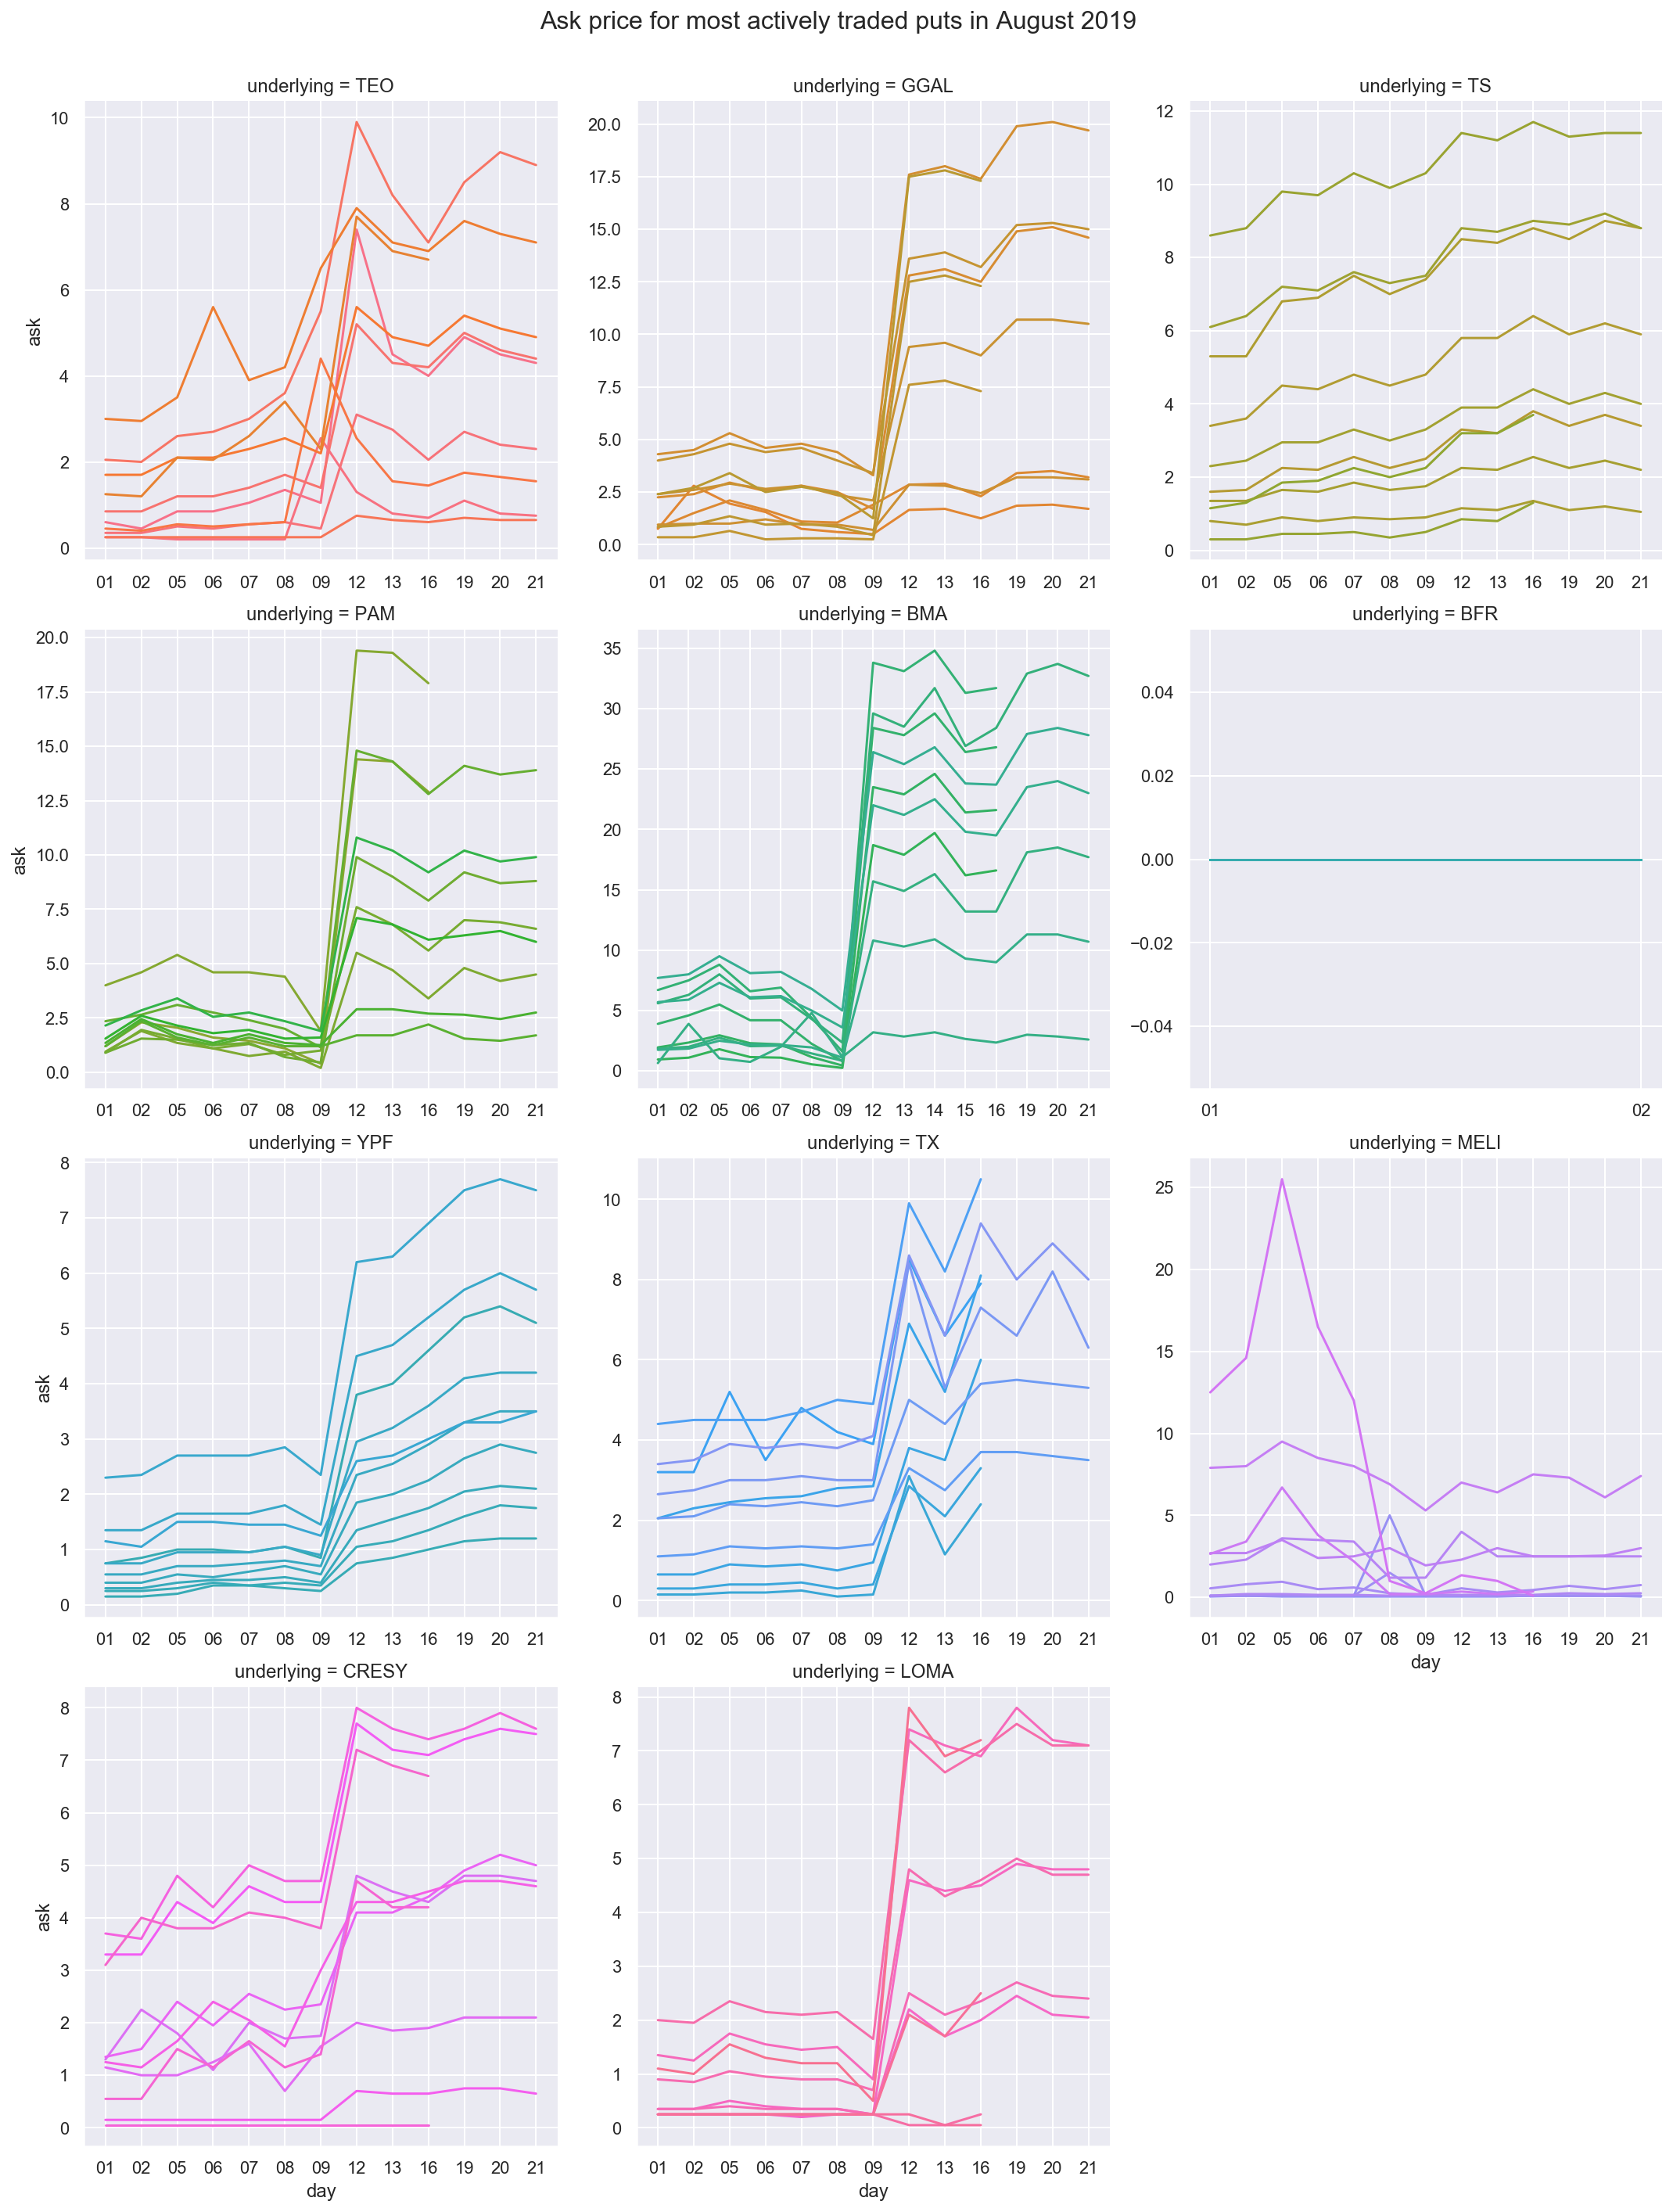

In [42]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=august_active_puts, ci=None)

g.fig.suptitle('Ask price for most actively traded puts in August 2019', size=16)
g.fig.subplots_adjust(top=0.94);

This plots reveal a huge drop in prices for the calls, and conversely a large increase in the price of puts, between Friday 9th and Monday 12th.